Student grades prediction

Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.

Dataset Link-
•  https://github.com/dsrscientist/dataset4
•  https://github.com/dsrscientist/dataset4/blob/main/Grades.csv


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv('Grade.csv')
df

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[571 rows x 43 columns]

As we observe there are many rows and less columns

let's look of data shape

In [4]:
df.shape

(571, 43)

as we observe there are total 571 rows and 43 columns.

In [5]:
df.shape[0]  # total rows

571

In [6]:
df.shape[1]  # total columns

43

Now check is there any null values in this data set or not?

In [9]:
df.isnull()

Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0       False   False   False   False      False   False   False   False   
1       False   False   False   False      False   False   False   False   
2       False   False   False   False      False   False   False   False   
3       False   False   False   False      False   False   False   False   
4       False   False   False   False      False   False   False   False   
..        ...     ...     ...     ...        ...     ...     ...     ...   
566     False   False   False   False      False   False   False   False   
567     False   False   False   False      False   False   False   False   
568     False   False   False   False      False   False   False   False   
569     False   False   False   False      False   False   False   False   
570     False   False   False   False      False   False   False   False   

     EL-102  EE-119  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0     False   False  ...   False   False   False   False   False   False   
1     False   False  ...   False   False   False   False   False   False   
2     False   False  ...   False   False   False   False   False   False   
3     False   False  ...   False   False   False   False   False   False   
4     False   False  ...   False   False   False   False   False   False   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566   False   False  ...   False   False   False   False   False   False   
567   False   False  ...   False   False   False   False   False   False   
568   False   False  ...   False   False   False   False   False   False   
569   False   False  ...   False   False   False   False   False   False   
570   False   False  ...   False   False   False   False   False   False   

     CS-419  CS-423  CS-412   CGPA  
0     False   False   False  False  
1     False   False   False  False  
2     False   False   False  False  
3     False   False   False  False  
4     False   False   False  False  
..      ...     ...     ...    ...  
566   False   False   False  False  
567   False   False   False  False  
568   False   False   False  False  
569   False   False   False  False  
570   False   False   False  False  

[571 rows x 43 columns]

As we observe in the manner of data frame now observe in sum.

In [10]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

Now we observe that there are in many columns has null values now take a look of it in heat map.

<AxesSubplot:>

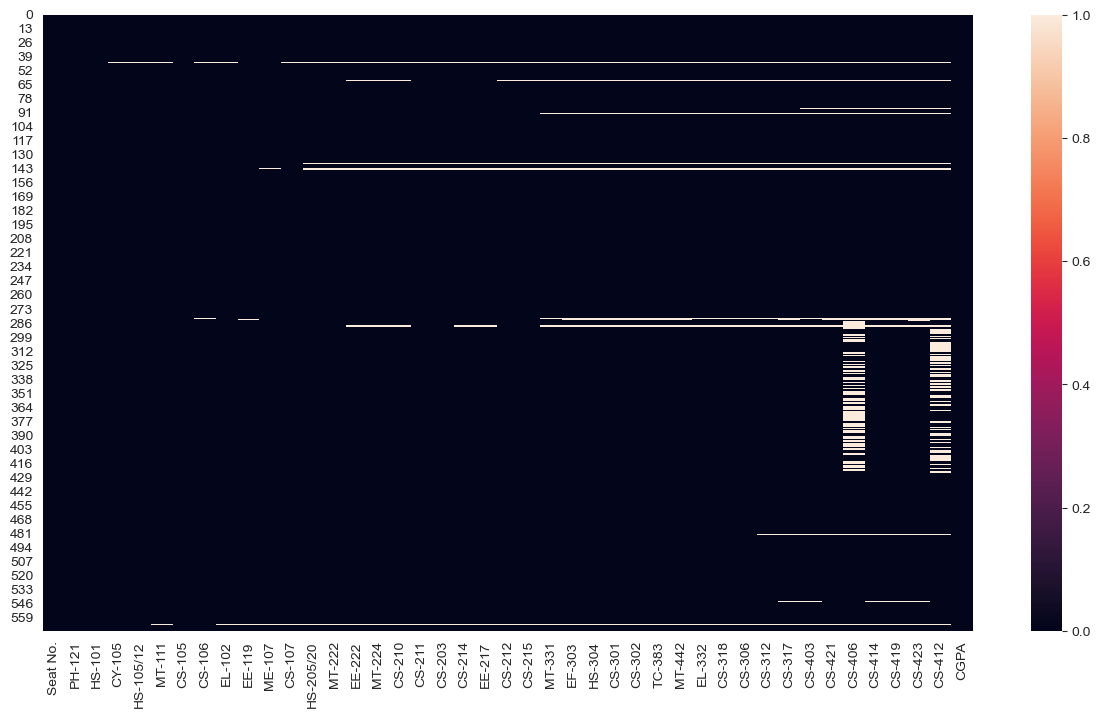

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

As we observe in the CS-406 and CS-412 has many null values.

Now we fill all the null values by use of it's mode. because data is in object type.

In [13]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [14]:
df['CS-406'].value_counts()

A-    177
A      79
B+     64
B      58
B-     22
C+     22
C      19
D+     14
C-      8
A+      8
F       6
D       5
W       3
WU      1
Name: CS-406, dtype: int64

In [16]:
df['CS-406']=df['CS-406'].fillna('A-')

In [17]:
df['CS-301'].value_counts()

A-    108
B+     74
B      71
A      66
B-     60
C      41
C+     37
C-     36
D      29
D+     29
A+      9
F       1
Name: CS-301, dtype: int64

In [18]:
df['CS-301']=df['CS-301'].fillna('A-')

In [19]:
df['HS-304'].value_counts()

A-    128
B      72
B-     70
B+     66
C      58
C+     53
C-     33
A      28
D      20
D+     19
F       6
A+      4
WU      2
W       2
Name: HS-304, dtype: int64

In [20]:
df['HS-304']=df['HS-304'].fillna('A-')

In [21]:
df['EF-303'].value_counts()

B     112
B-     92
C      61
B+     59
C+     58
C-     56
D+     49
A-     38
D      19
A      14
F       2
WU      1
Name: EF-303, dtype: int64

In [22]:
df['CS-302'].value_counts()

A-    113
B     102
A      86
B+     81
B-     60
C+     32
C      28
D      21
C-     19
D+     10
A+      9
Name: CS-302, dtype: int64

In [23]:
df['CS-302']=df['CS-302'].fillna('A-')

In [24]:
df['TC-383'].value_counts()

A     105
A-     73
B+     68
B      59
C+     44
D+     44
C-     42
C      42
B-     40
A+     23
D      20
F       1
Name: TC-383, dtype: int64

In [25]:
df['TC-383'].mode()

0    A
Name: TC-383, dtype: object

In [26]:
df['MT-442'].value_counts()

A-    140
A     130
B+     65
B      47
A+     39
B-     30
C-     28
C+     24
C      24
D      20
D+     13
F       1
Name: MT-442, dtype: int64

In [27]:
df['MT-442'].mode()

0    A-
Name: MT-442, dtype: object

In [28]:
df['MT-442']=df['MT-442'].fillna('A-')

In [29]:
df['EL-332'].value_counts()

A-    96
A     76
B+    68
B     67
B-    62
C     49
C+    38
C-    32
D+    22
D     22
A+    20
F      9
WU     1
Name: EL-332, dtype: int64

In [30]:
df['EL-332']=df['EL-332'].fillna('A-')

In [31]:
df['CS-318'].value_counts()

A-    89
B-    69
B     68
B+    65
C     53
C+    49
A     42
C-    40
D     36
D+    29
F     10
A+     6
WU     5
W      1
Name: CS-318, dtype: int64

In [32]:
df['CS-318']=df['CS-318'].fillna('A-')

In [33]:
df['CS-306'].value_counts()

A-    120
B+     75
A      74
B-     64
B      53
C-     40
C      37
C+     36
D      31
D+     18
A+     10
F       3
WU      1
Name: CS-306, dtype: int64

In [34]:
df['CS-306']=df['CS-306'].fillna('A-')

In [35]:
df['CS-312'].value_counts()

A+    93
A     86
A-    63
D+    52
C     48
C-    44
B+    42
B     37
C+    37
B-    36
D     19
F      2
W      1
WU     1
Name: CS-312, dtype: int64

In [36]:
df['CS-312']=df['CS-312'].fillna('A+')

In [37]:
df['CS-317'].value_counts()

B-    79
B     75
C     70
A-    66
B+    58
C+    57
A     47
C-    41
D+    34
D     16
A+     9
F      7
Name: CS-317, dtype: int64

In [38]:
df['CS-317']=df['CS-317'].fillna('B-')    

In [39]:
df['CS-403'].value_counts()

A     133
A-    106
B+     62
B-     55
B      54
D+     35
C      33
C+     32
C-     30
A+     15
D       4
Name: CS-403, dtype: int64

In [40]:
df['CS-403']=df['CS-403'].fillna('A')

In [41]:
df['CS-421'].value_counts()

B     86
B-    74
C     68
C+    61
C-    60
B+    60
A-    47
D+    36
A     25
D     21
F     17
A+     2
W      2
Name: CS-421, dtype: int64

In [42]:
df['CS-421']=df['CS-421'].fillna('B')

In [43]:
df['CS-419'].value_counts()

A-    120
B      89
B+     85
B-     78
A      56
C+     46
C      40
C-     20
D+     13
D       7
A+      2
F       2
Name: CS-419, dtype: int64

In [44]:
df['CS-419']=df['CS-419'].fillna('A-')

In [45]:
df['CS-423'].value_counts()

A-    122
A      78
B+     75
B      65
B-     56
C      45
C+     39
C-     29
D+     25
D      15
F       5
A+      3
Name: CS-423, dtype: int64

In [46]:
df['CS-423']=df['CS-423'].fillna('A-')

In [47]:
df['CS-412'].value_counts()

A-    157
B+     80
A      77
B      65
B-     37
C+     24
C      19
D+      8
C-      7
F       6
D       5
A+      4
W       3
Name: CS-412, dtype: int64

In [48]:
df.dropna(inplace=True)

In [49]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

For Treatment of null value we apply most frequent grade to all null values which is above 10 and below 10 means 2,5,7 all are remove from dataset.

In [50]:
df.shape

(491, 43)

As we observe now our dataset has 561 rows and 43 columns.

In [52]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

Now check information of our data.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   491 non-null    object 
 1   PH-121     491 non-null    object 
 2   HS-101     491 non-null    object 
 3   CY-105     491 non-null    object 
 4   HS-105/12  491 non-null    object 
 5   MT-111     491 non-null    object 
 6   CS-105     491 non-null    object 
 7   CS-106     491 non-null    object 
 8   EL-102     491 non-null    object 
 9   EE-119     491 non-null    object 
 10  ME-107     491 non-null    object 
 11  CS-107     491 non-null    object 
 12  HS-205/20  491 non-null    object 
 13  MT-222     491 non-null    object 
 14  EE-222     491 non-null    object 
 15  MT-224     491 non-null    object 
 16  CS-210     491 non-null    object 
 17  CS-211     491 non-null    object 
 18  CS-203     491 non-null    object 
 19  CS-214     491 non-null    object 
 20  EE-217    

As we observe there are 561 rows and all are non-null values.

Now we check data types of dataset.

In [54]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

As we observe all features or input columns are in object type and our target is in float type data.

Now we observe that there are no requirement of Seat number column so we should remove it.

In [55]:
df.drop(['Seat No.'],axis=1,inplace=True)
df.head()

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119 ME-107  \
0     B-     D+     C-         C     C-     D+      D     C-     B-     C-   
1      A      D     D+         D     B-      C      D      A     D+      D   
2      A      B      A        B-     B+      A     B-     B+     A-     A-   
3      D     C+     D+         D      D     A-     D+     C-      D     C+   
4     A-     A-     A-        B+      A      A     A-     B+      A     A-   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 42 columns]

now we have 41 input columns and 1 target column total 42 columns.

In [56]:
df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [57]:
uniques=['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']

for i in uniques:
    print(str(i),'=',df[i].unique(),'in this column has total',len(df[i].unique()),'unique values.','\n')

PH-121 = ['B-' 'A' 'D' 'A-' 'B+' 'B' 'C+' 'C' 'C-' 'D+' 'A+'] in this column has total 11 unique values. 

HS-101 = ['D+' 'D' 'B' 'C+' 'A-' 'B-' 'C-' 'B+' 'C' 'A' 'A+'] in this column has total 11 unique values. 

CY-105 = ['C-' 'D+' 'A' 'A-' 'B' 'C+' 'B+' 'B-' 'C' 'D' 'A+'] in this column has total 11 unique values. 

HS-105/12 = ['C' 'D' 'B-' 'B+' 'D+' 'B' 'C-' 'C+' 'A-' 'A' 'A+'] in this column has total 11 unique values. 

MT-111 = ['C-' 'B-' 'B+' 'D' 'A' 'C+' 'A-' 'C' 'B' 'D+' 'A+'] in this column has total 11 unique values. 

CS-105 = ['D+' 'C' 'A' 'A-' 'B' 'B-' 'B+' 'C+' 'C-' 'A+' 'D'] in this column has total 11 unique values. 

CS-106 = ['D' 'B-' 'D+' 'A-' 'C+' 'A' 'C-' 'C' 'B' 'B+' 'A+'] in this column has total 11 unique values. 

EL-102 = ['C-' 'A' 'B+' 'B' 'A-' 'B-' 'C' 'C+' 'D+' 'D' 'A+'] in this column has total 11 unique values. 

EE-119 = ['B-' 'D+' 'A-' 'D' 'A' 'B+' 'B' 'C-' 'C+' 'C' 'A+'] in this column has total 11 unique values. 

ME-107 = ['C-' 'D' 'A-' 'C+' 'B+' 

As we observe in above data there are in the manner of avarage 10 to 12 unique grades in each columns.

Now we done to check unique values of columns

# Now we visualize of data.

Univariate Analysis

For univariate analysis we can use count plot its unique values.

PH-121


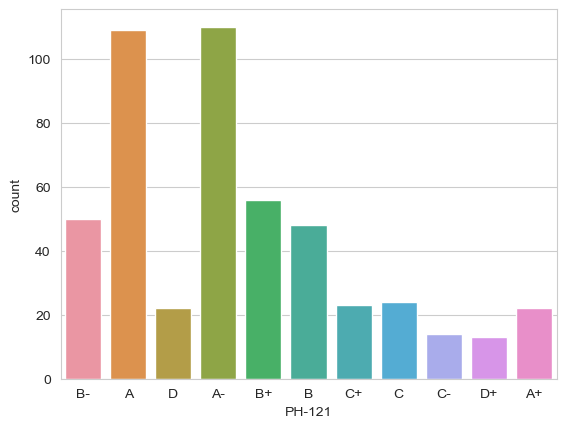

HS-101


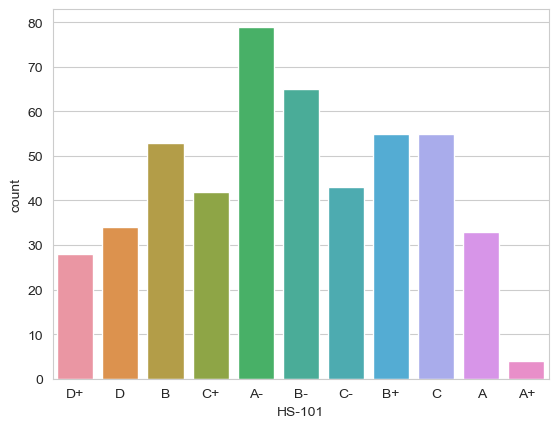

CY-105


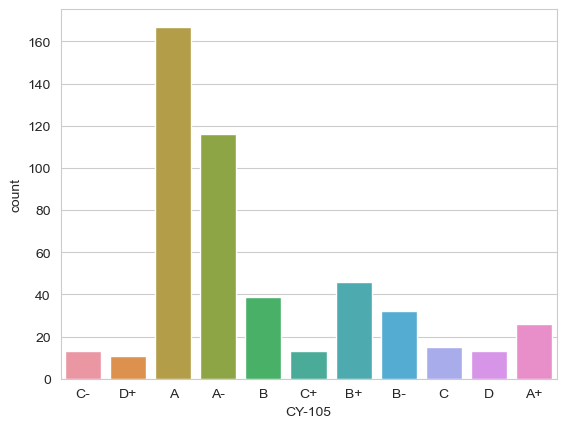

HS-105/12


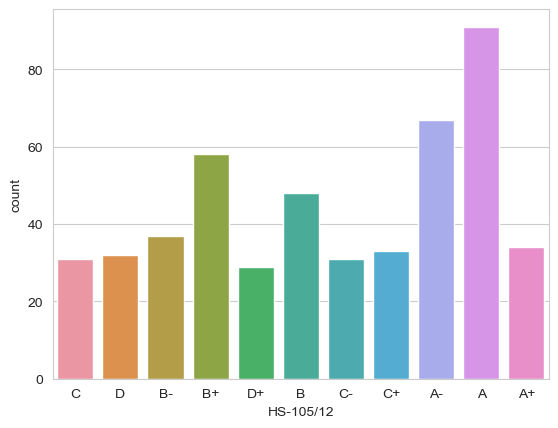

MT-111


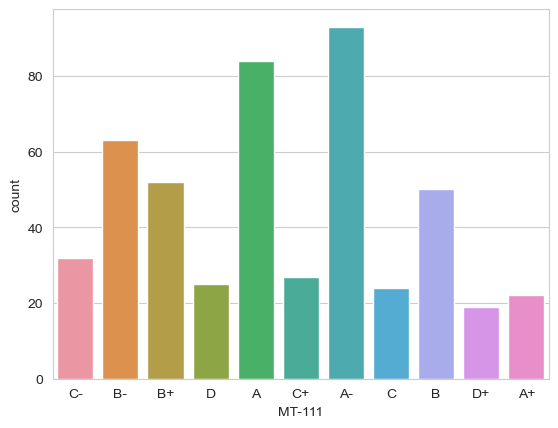

CS-105


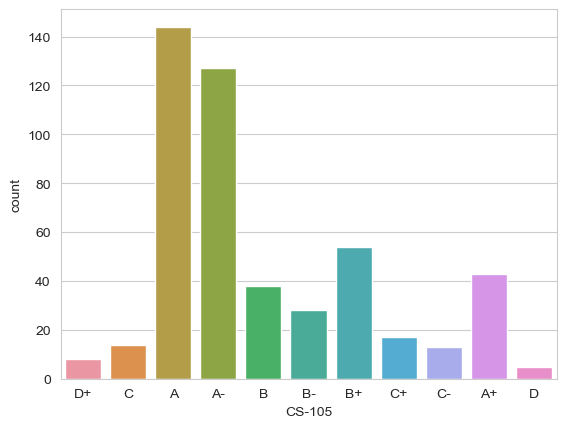

CS-106


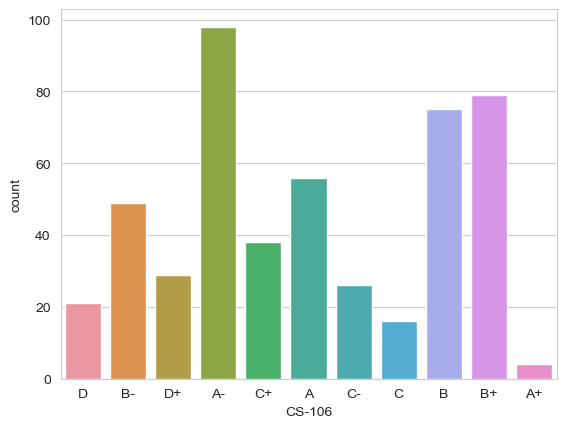

EL-102


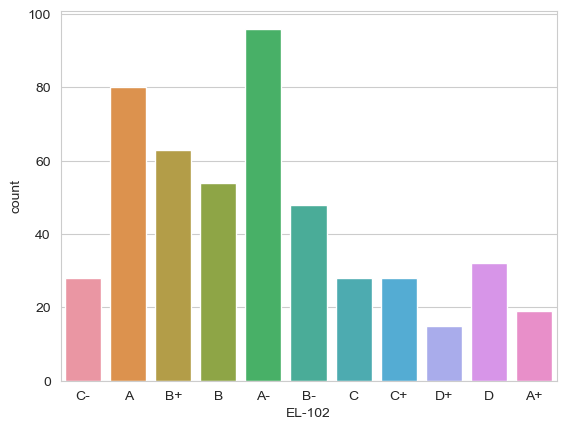

EE-119


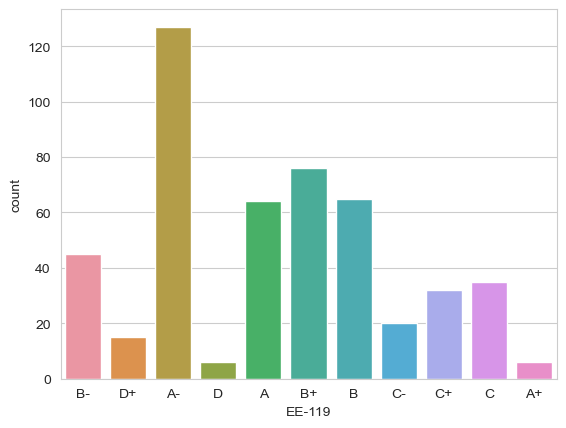

ME-107


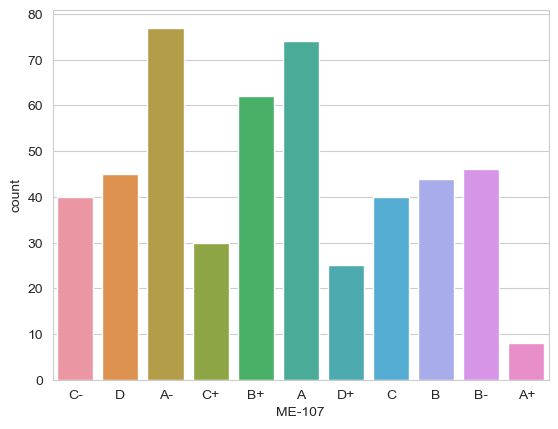

CS-107


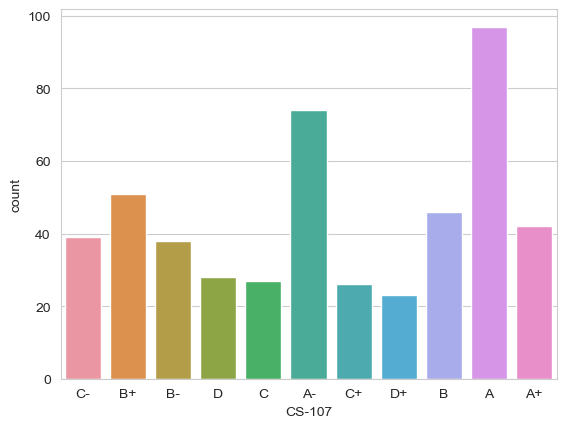

HS-205/20


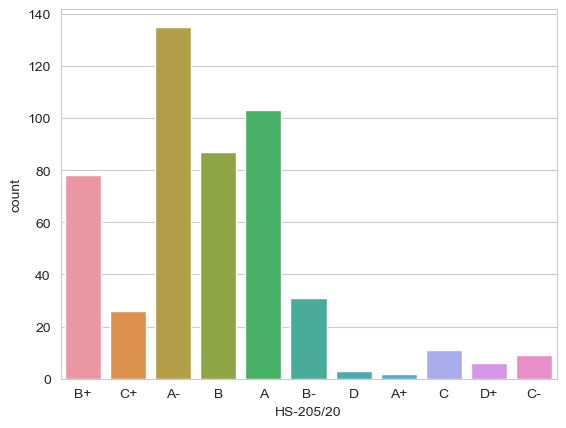

MT-222


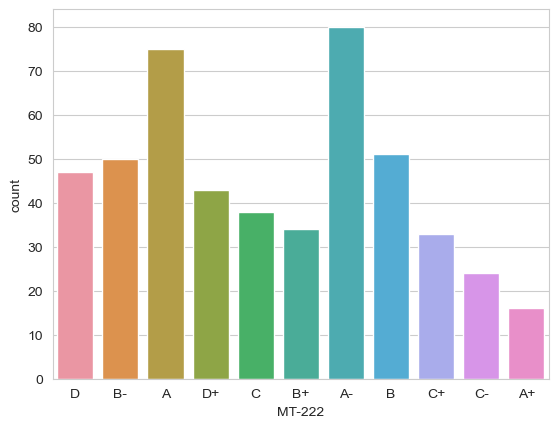

EE-222


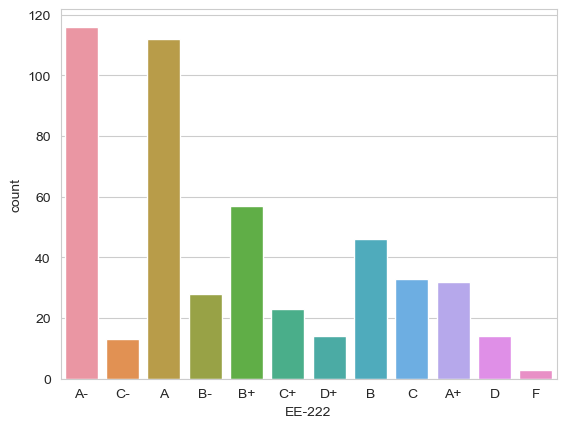

MT-224


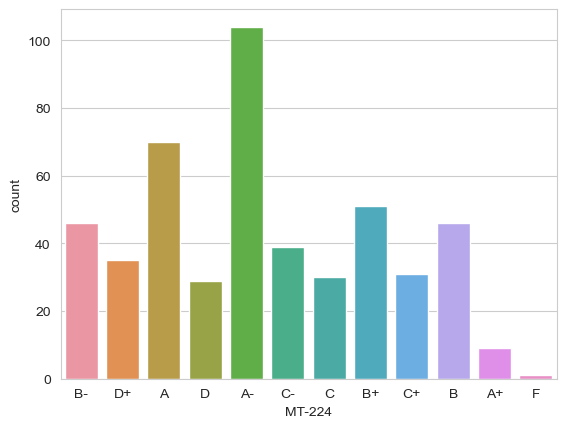

CS-210


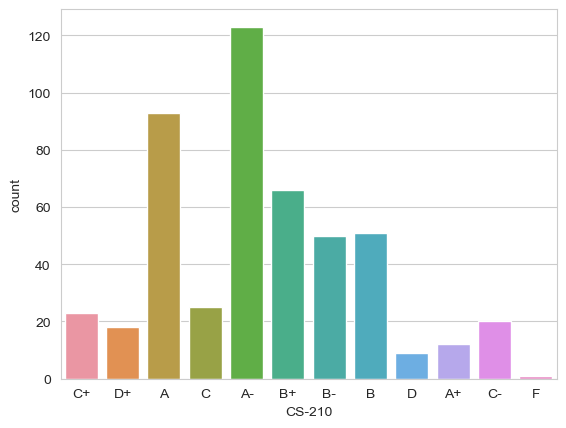

CS-211


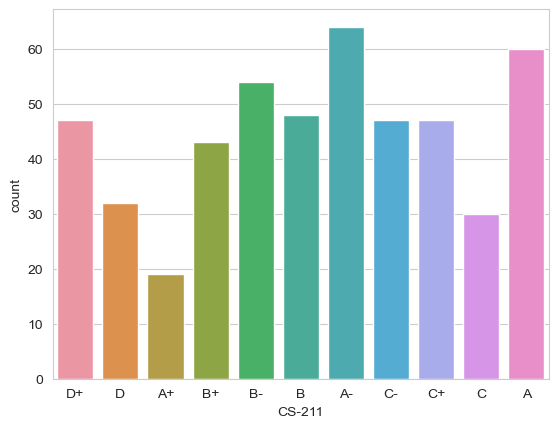

CS-203


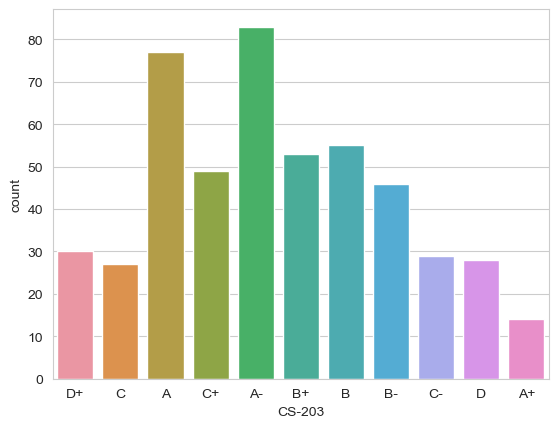

CS-214


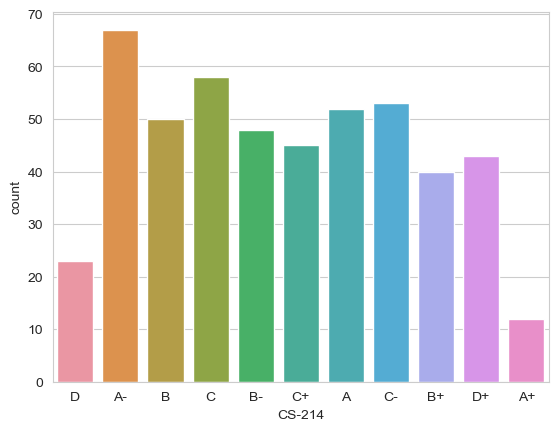

EE-217


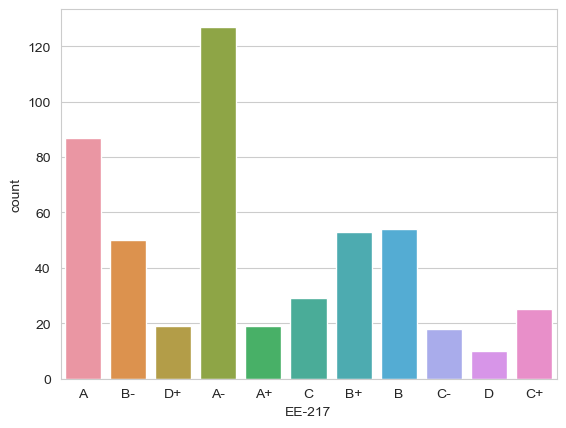

CS-212


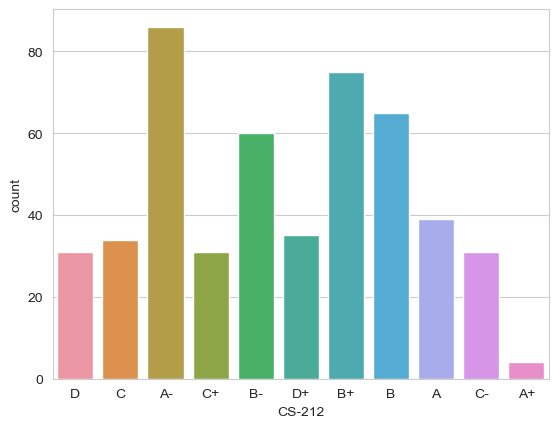

CS-215


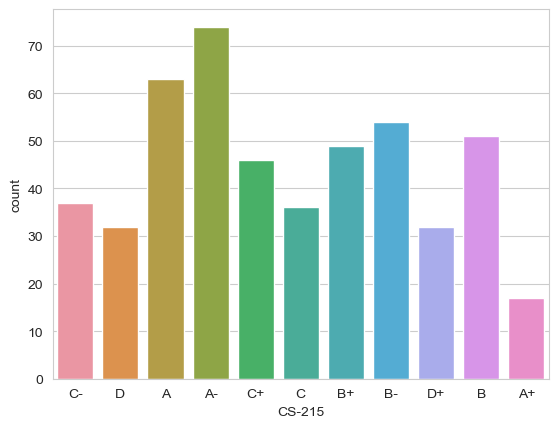

MT-331


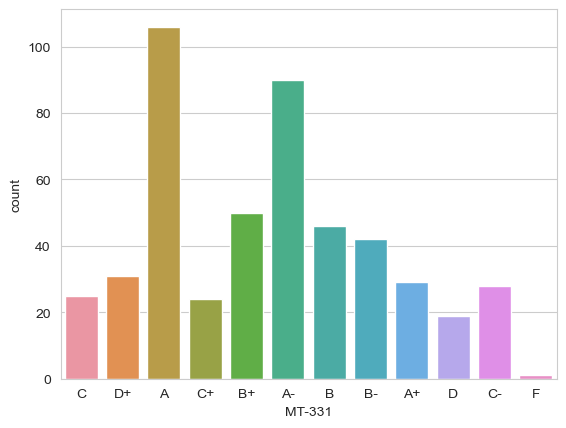

EF-303


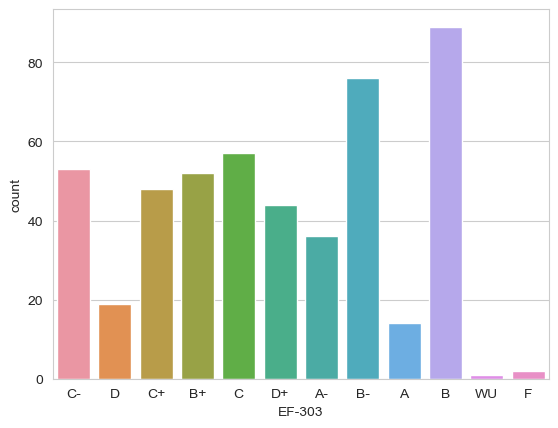

HS-304


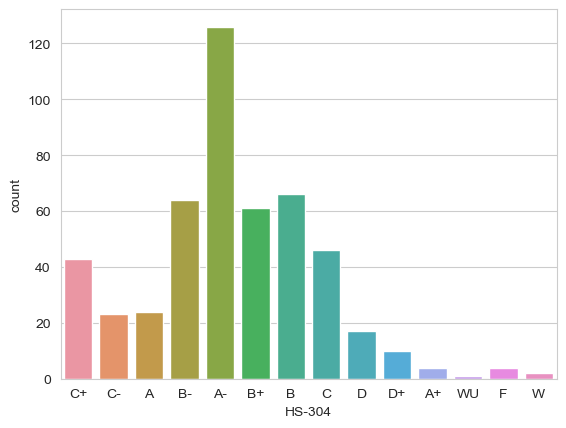

CS-301


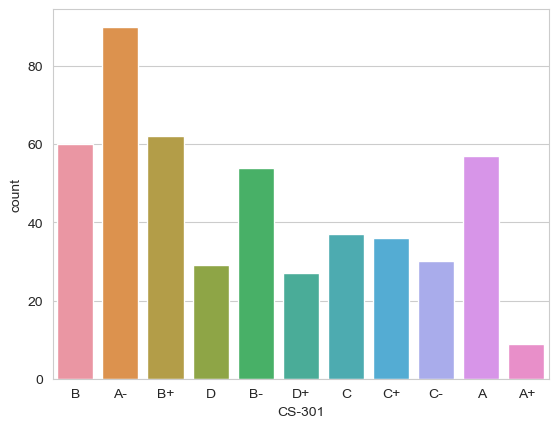

CS-302


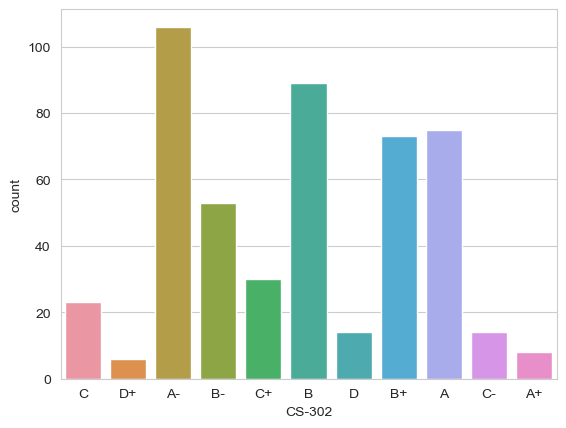

TC-383


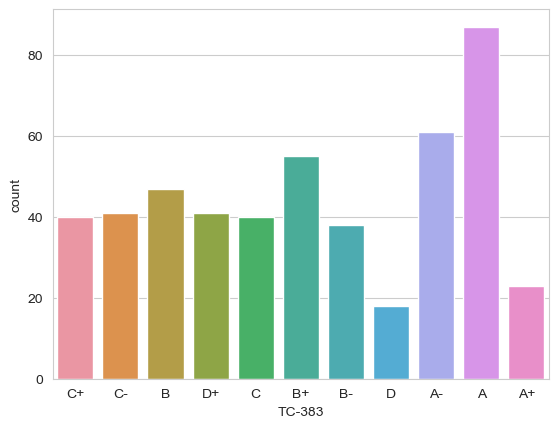

MT-442


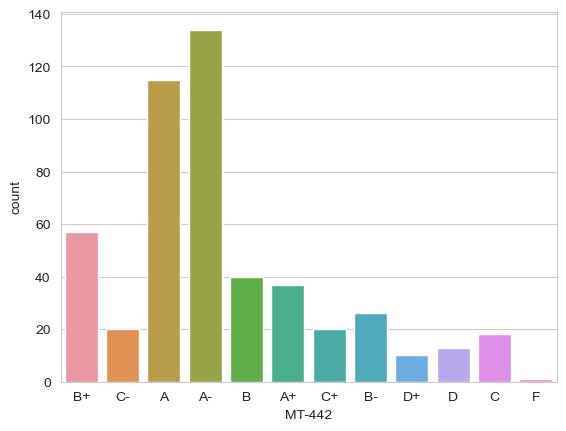

EL-332


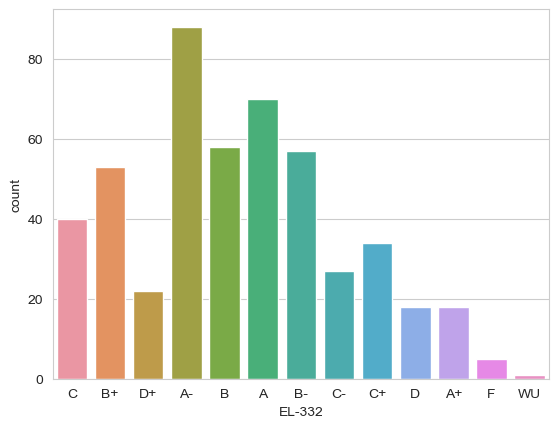

CS-318


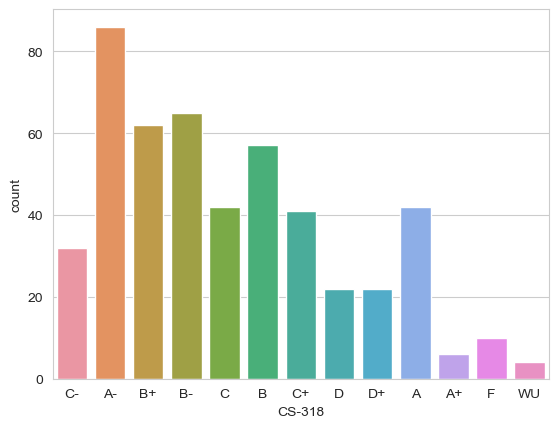

CS-306


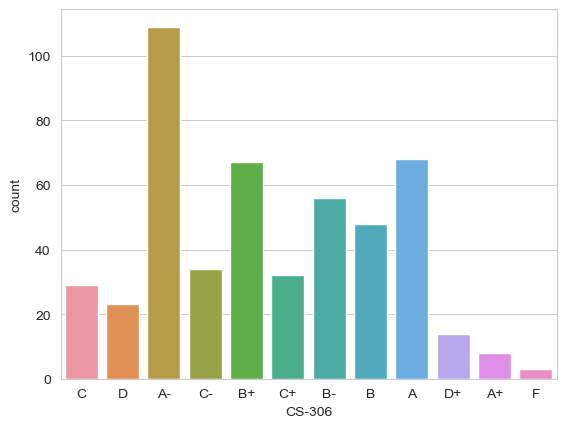

CS-312


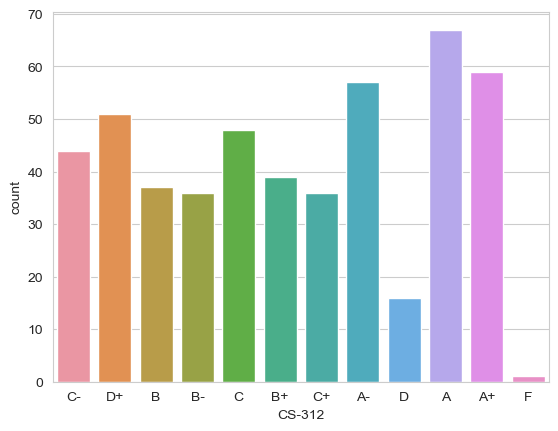

CS-317


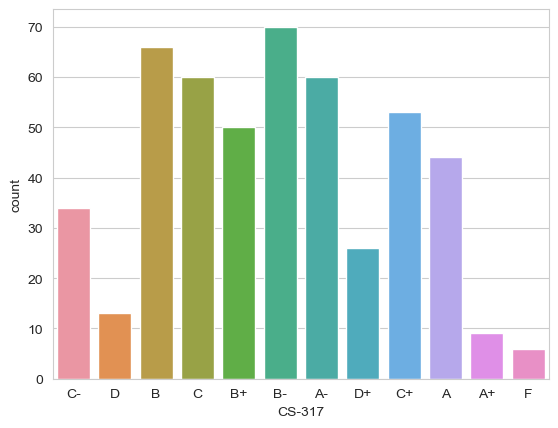

CS-403


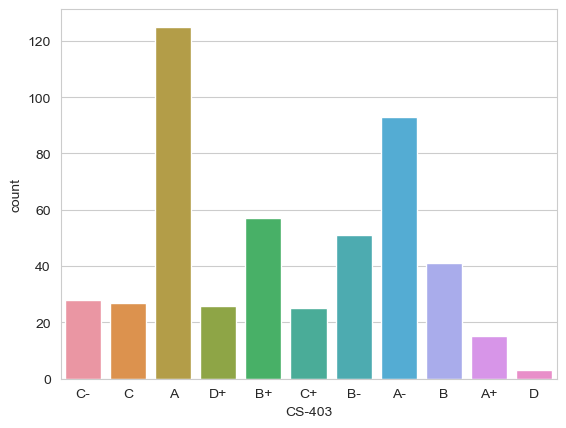

CS-421


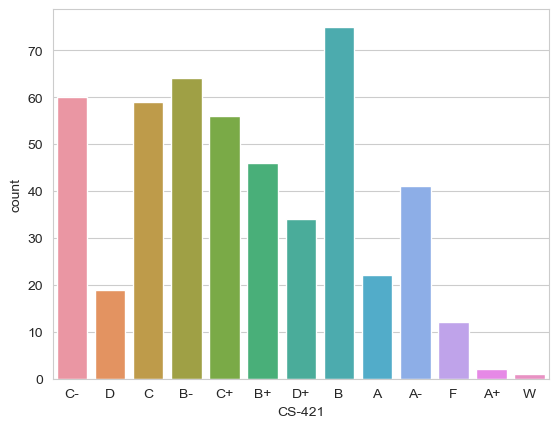

CS-406


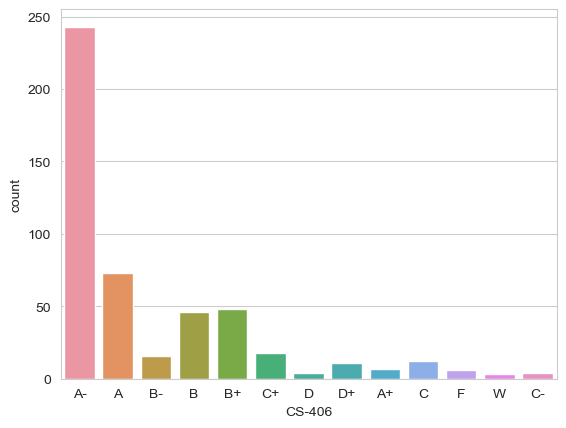

CS-414


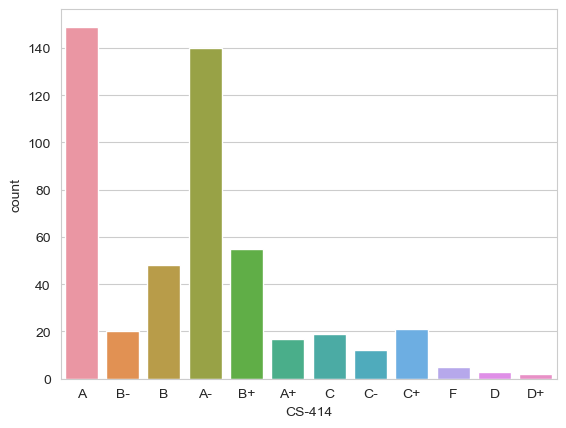

CS-419


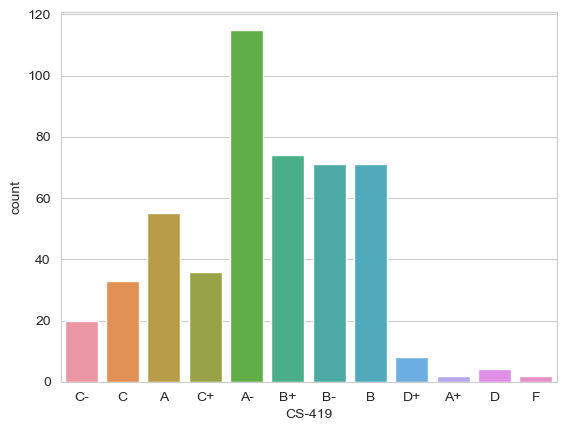

CS-423


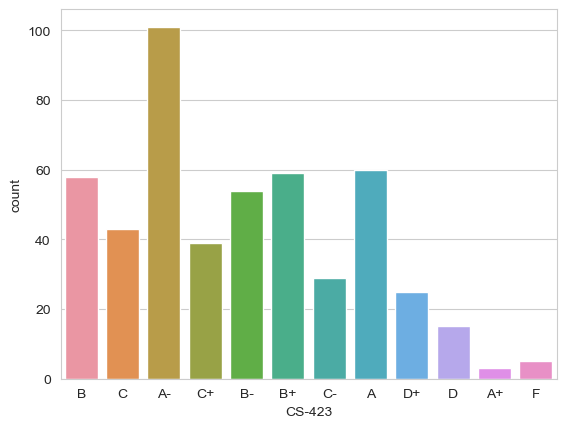

CS-412


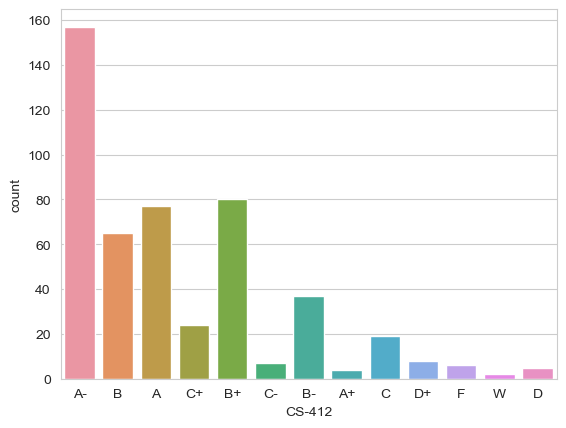

In [58]:
Count=['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']

for i in Count:
    print(str(i))
    sns.countplot(df[i])
    plt.show()

As we observed in count plot majority are in A-/A/B/B-.

<AxesSubplot:xlabel='CGPA', ylabel='Count'>

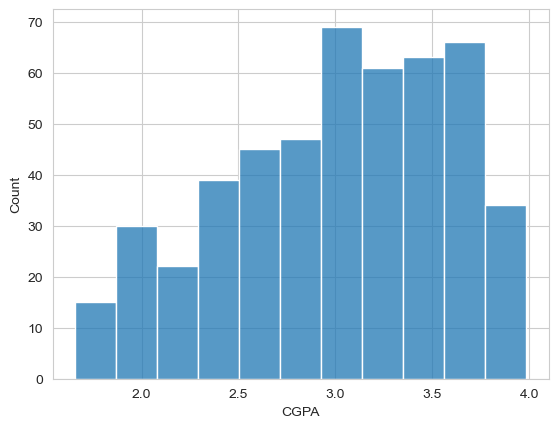

In [59]:
sns.histplot(df['CGPA'])

# Now we go with bivariate analysis first we should convert object data type to encode them.

In [61]:
from sklearn.preprocessing import LabelEncoder # import

In [62]:
le=LabelEncoder()
for i in df.drop(['CGPA'],axis=1):
    df[i]=le.fit_transform(df[i])
df

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0         5      10       8          6       8      10       9       8   
1         0       9      10          9       5       6       9       0   
2         0       3       0          5       4       0       5       4   
3         9       7      10          9       9       2      10       8   
4         2       2       2          4       0       0       2       4   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566       3       0       0          2       1       0       2       2   
567       1       0       0          0       0       0       0       2   
568       3       0       2          4       0       0       0       0   
569       0       4       9          0       9      10       5       8   
570       6       9       9          6       6      10       3       7   

     EE-119  ME-107  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0         5       8  ...       8       8       8       8       2       0   
1        10       9  ...      10       9       6       9       2       5   
2         2       2  ...       3       3       0       6       0       0   
3         9       7  ...      10       6      10       8       5       3   
4         0       2  ...       5       4       4       5       2       0   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566       1       4  ...       2       2       0       0       0       4   
567       0       0  ...       4       4       0       0       2       3   
568       0       3  ...       2       3       0       4       0       6   
569       5       8  ...       9       3       3       8       9       6   
570       6      10  ...       7       6       5       9      11       8   

     CS-419  CS-423  CS-412   CGPA  
0         8       3       2  2.205  
1         6       6       3  2.008  
2         0       2       0  3.608  
3         7       7       7  1.906  
4         2       2       0  3.448  
..      ...     ...     ...    ...  
566       4       3       0  3.798  
567       2       6       2  3.772  
568       4       2       2  3.470  
569       3       5       6  2.193  
570       4       9       8  1.753  

[491 rows x 42 columns]

In [63]:
df.dtypes

PH-121         int32
HS-101         int32
CY-105         int32
HS-105/12      int32
MT-111         int32
CS-105         int32
CS-106         int32
EL-102         int32
EE-119         int32
ME-107         int32
CS-107         int32
HS-205/20      int32
MT-222         int32
EE-222         int32
MT-224         int32
CS-210         int32
CS-211         int32
CS-203         int32
CS-214         int32
EE-217         int32
CS-212         int32
CS-215         int32
MT-331         int32
EF-303         int32
HS-304         int32
CS-301         int32
CS-302         int32
TC-383         int32
MT-442         int32
EL-332         int32
CS-318         int32
CS-306         int32
CS-312         int32
CS-317         int32
CS-403         int32
CS-421         int32
CS-406         int32
CS-414         int32
CS-419         int32
CS-423         int32
CS-412         int32
CGPA         float64
dtype: object

# Bivariate Analysis

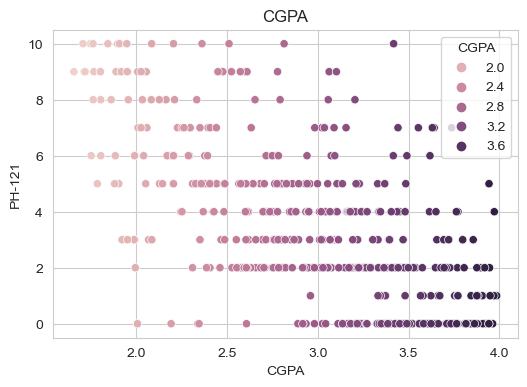

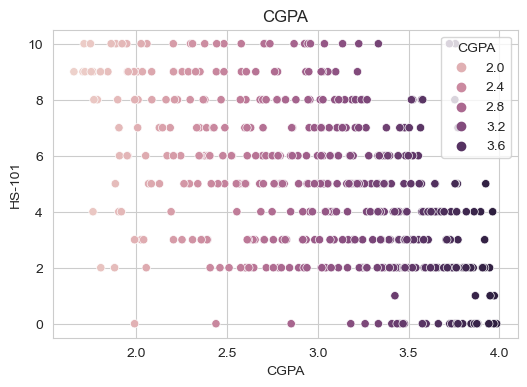

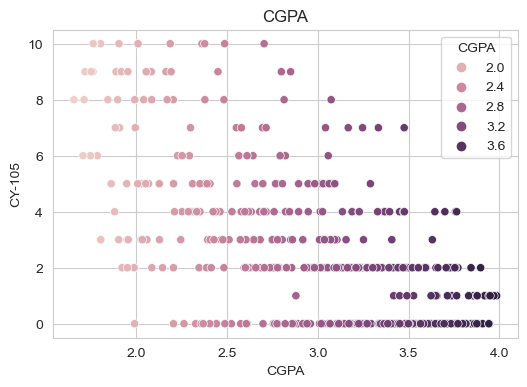

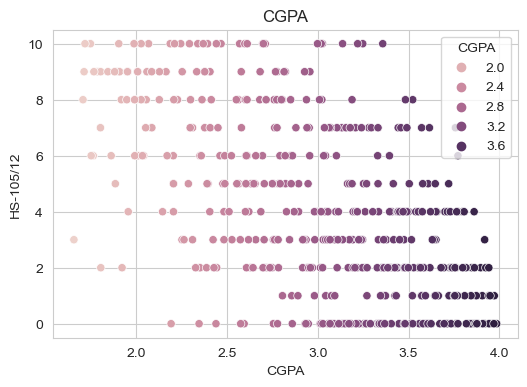

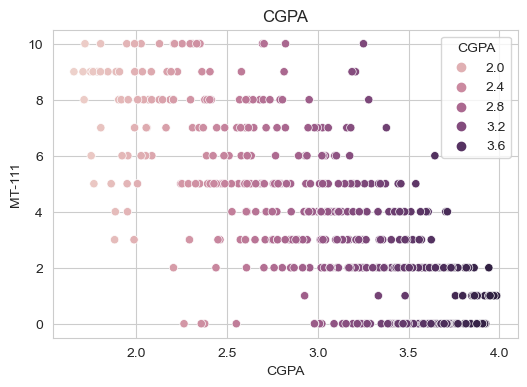

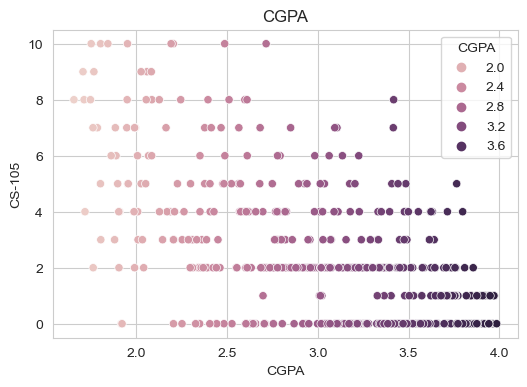

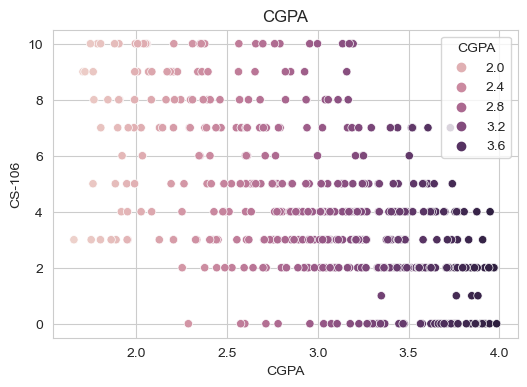

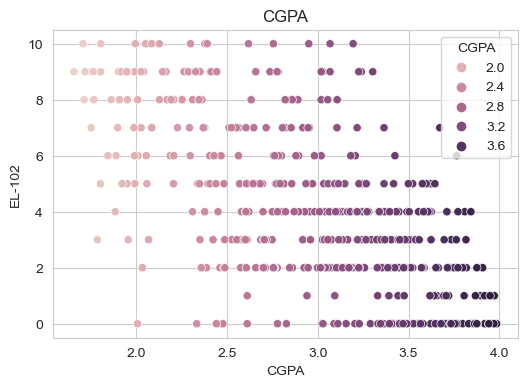

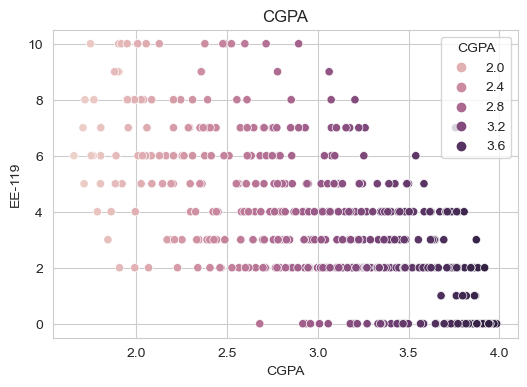

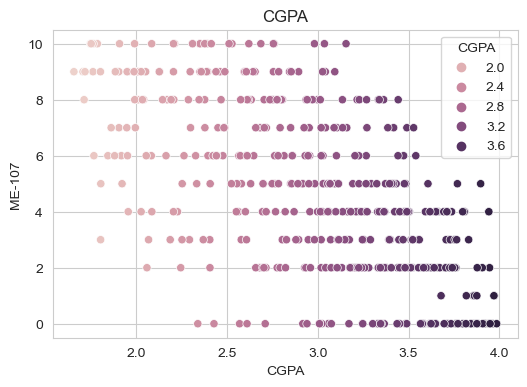

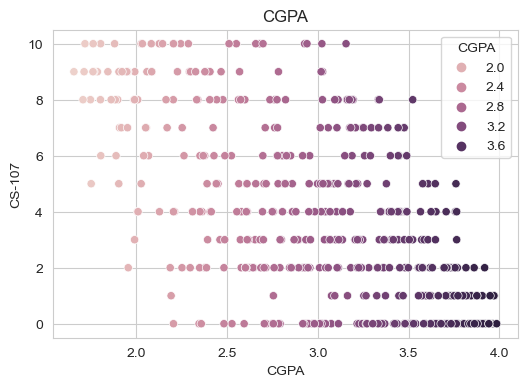

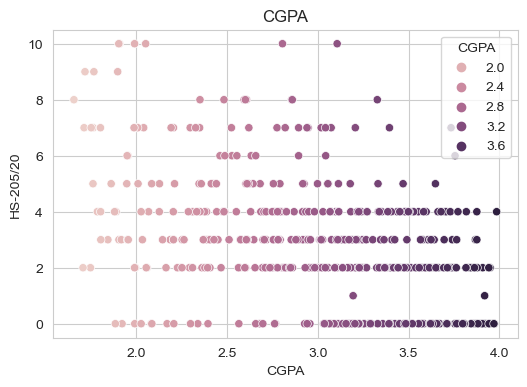

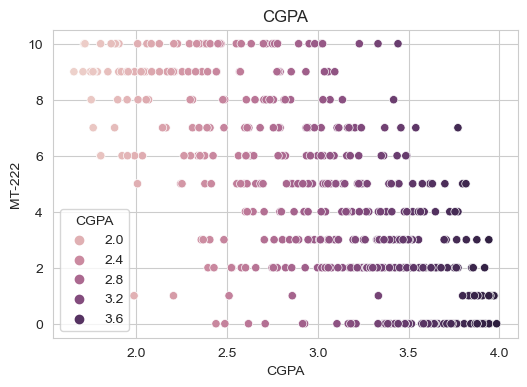

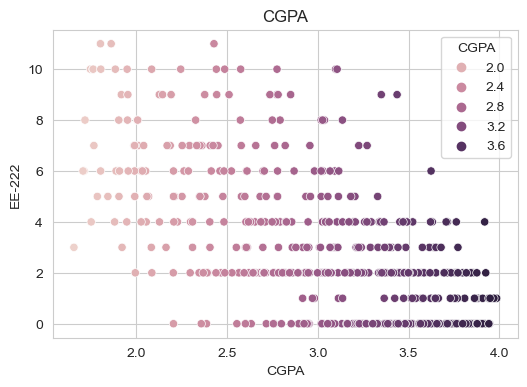

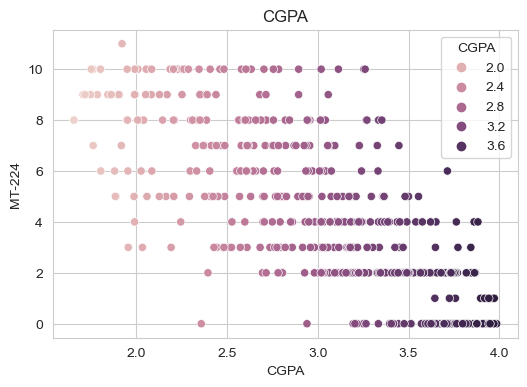

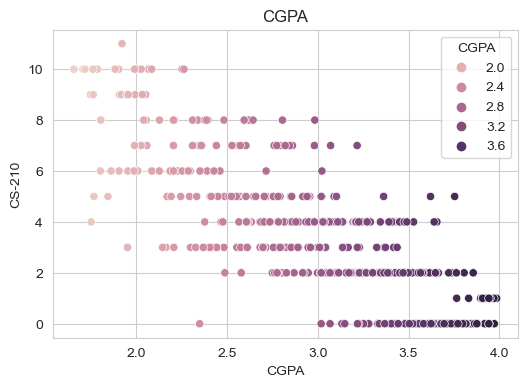

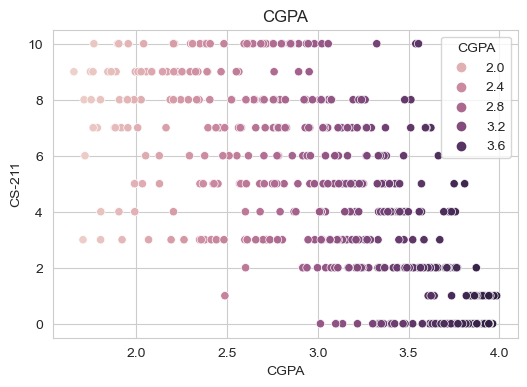

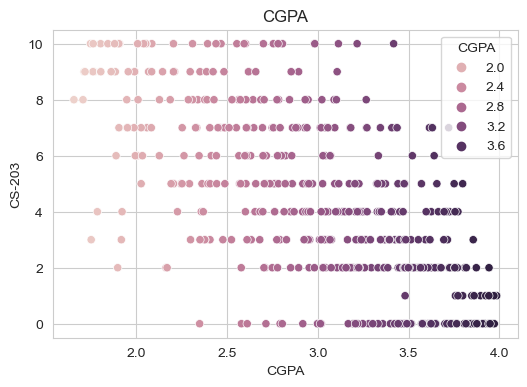

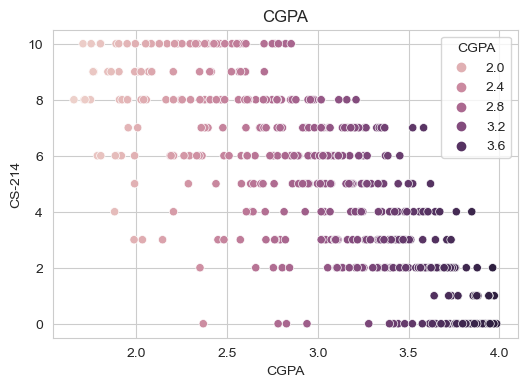

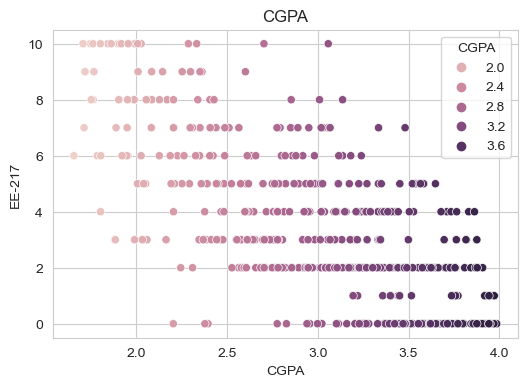

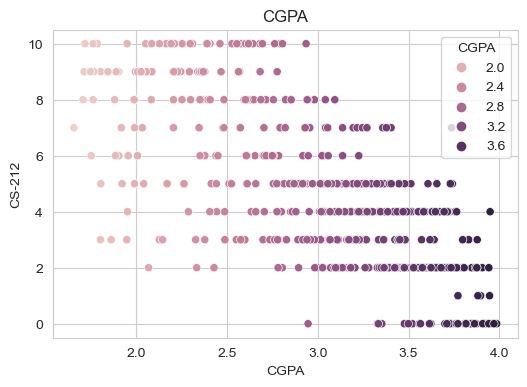

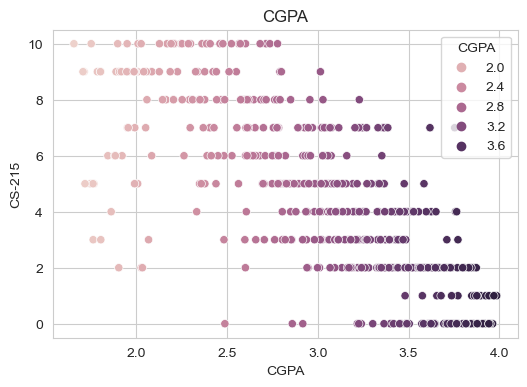

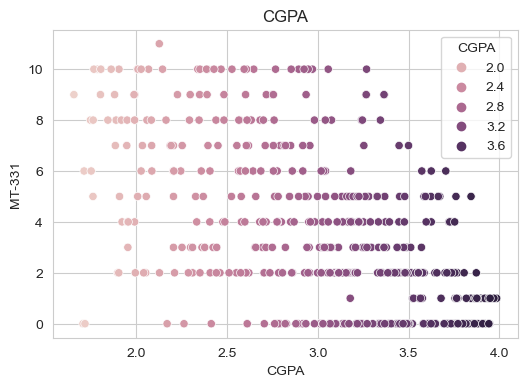

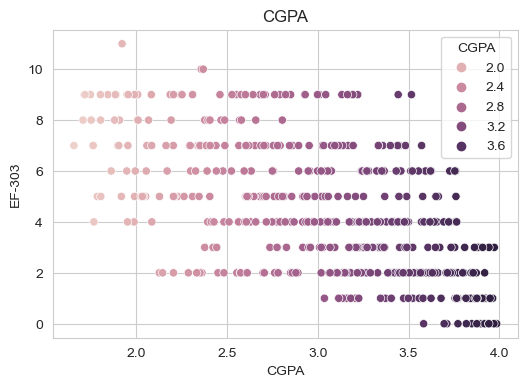

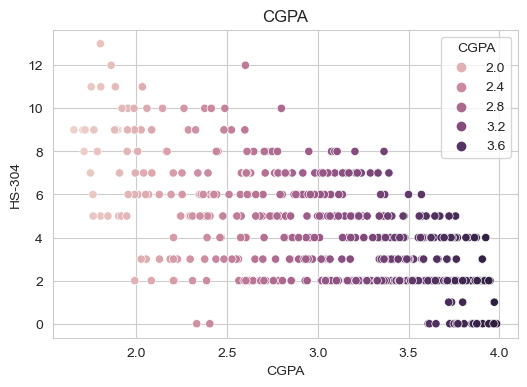

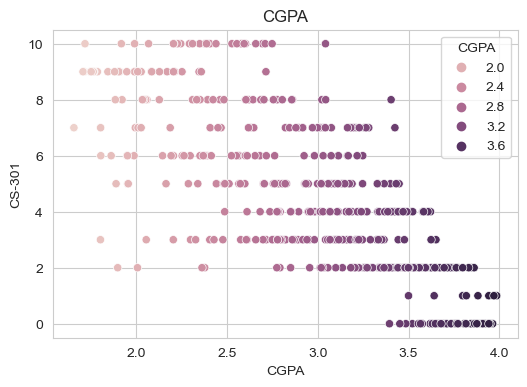

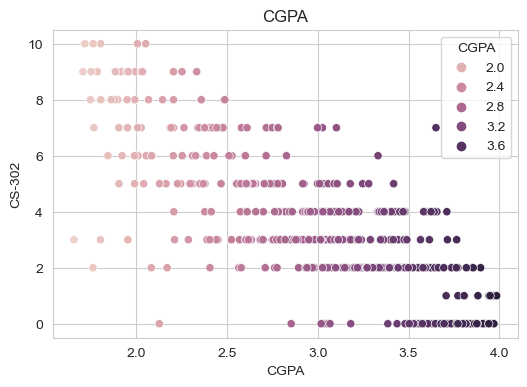

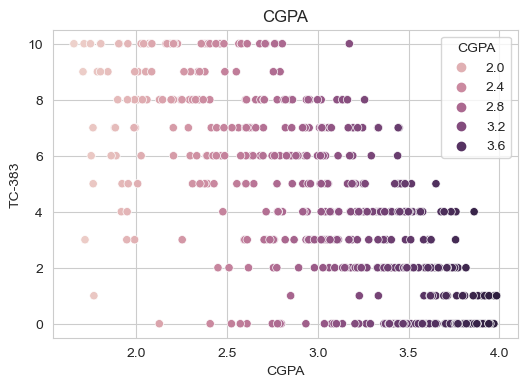

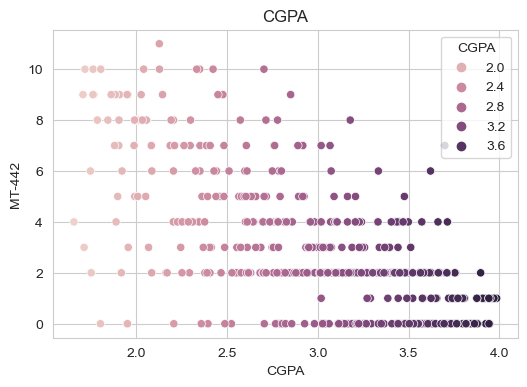

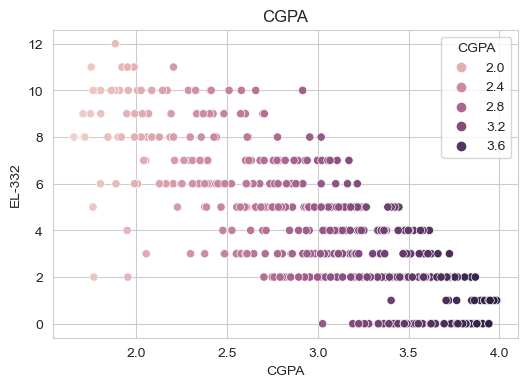

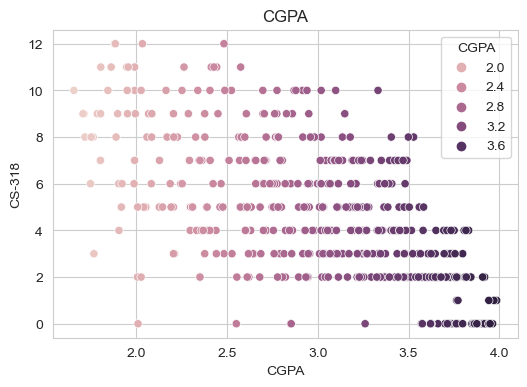

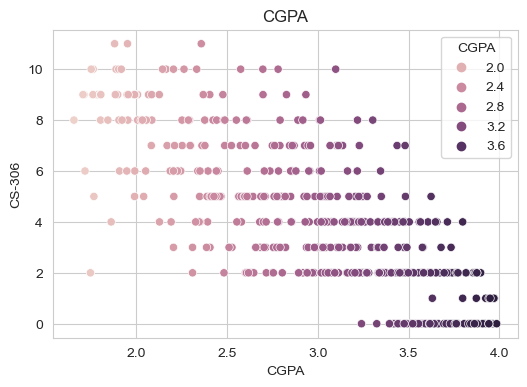

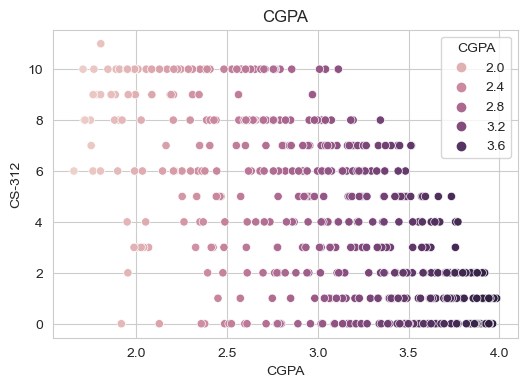

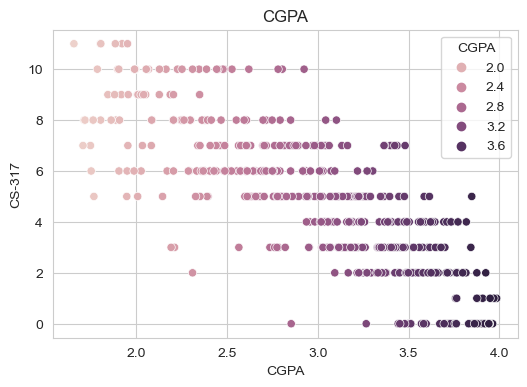

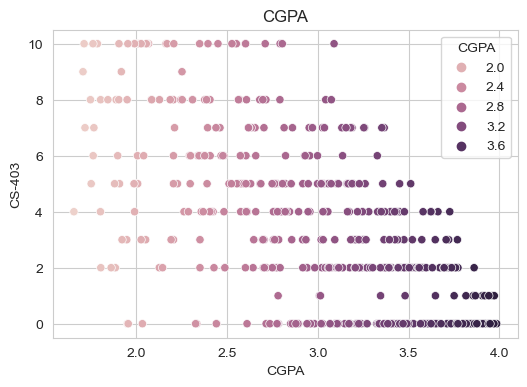

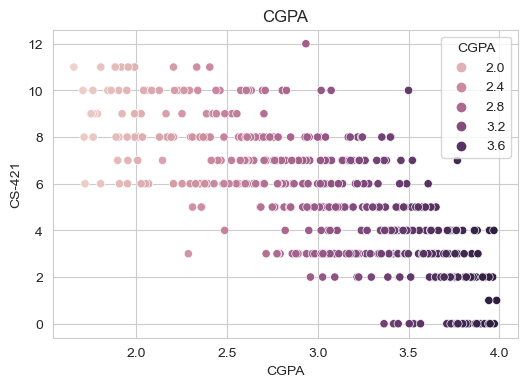

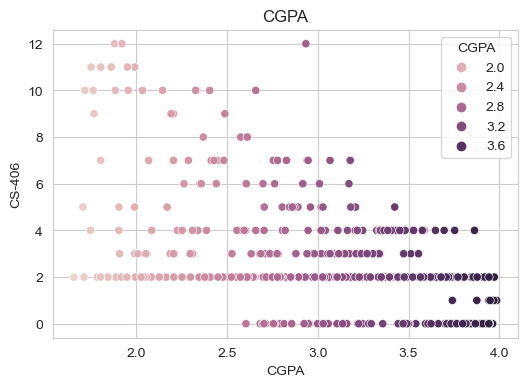

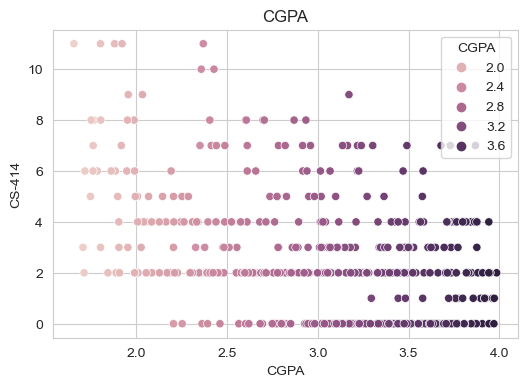

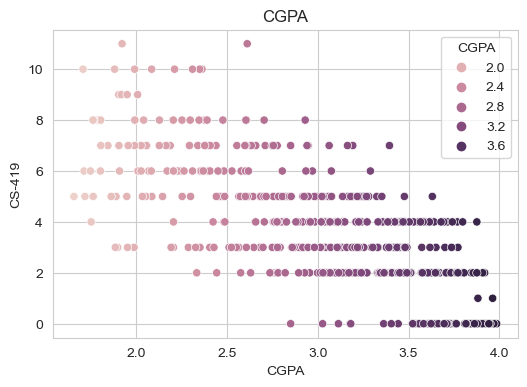

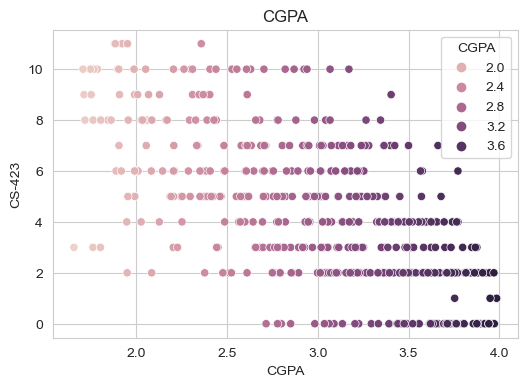

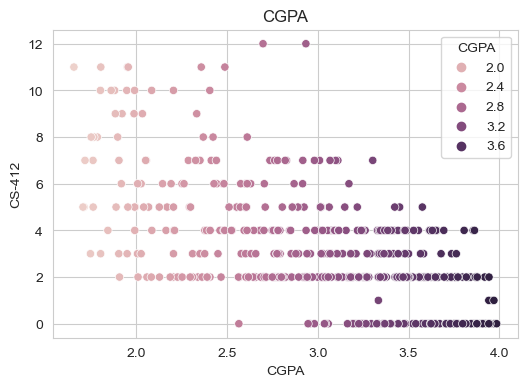

In [64]:
# plot graph for co-relation in Bi Variate Analysis
for col in df.drop(['CGPA'],axis=1):
    plt.figure(figsize=(6,4))
    plt.title('CGPA')
    sns.scatterplot(df['CGPA'],df[col],hue=df['CGPA'])
    plt.show()

<Figure size 600x400 with 0 Axes>

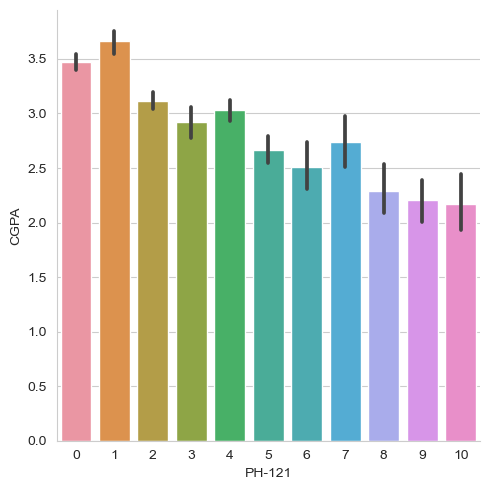

<Figure size 600x400 with 0 Axes>

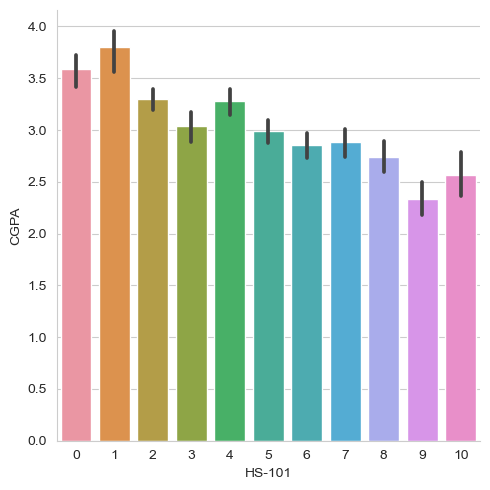

<Figure size 600x400 with 0 Axes>

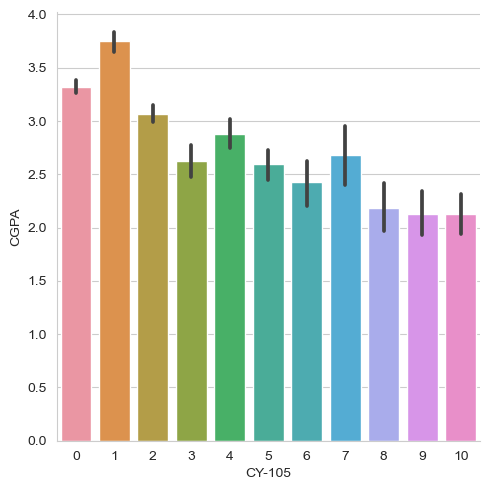

<Figure size 600x400 with 0 Axes>

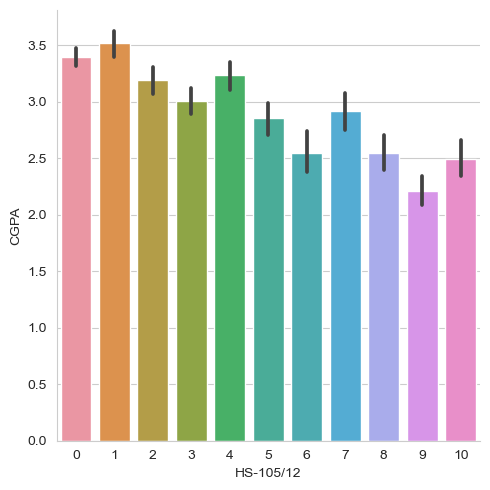

<Figure size 600x400 with 0 Axes>

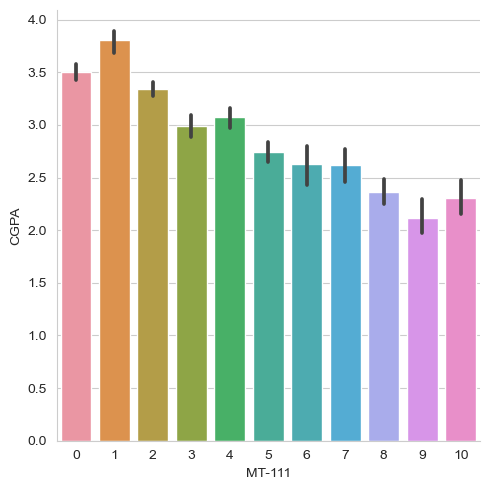

<Figure size 600x400 with 0 Axes>

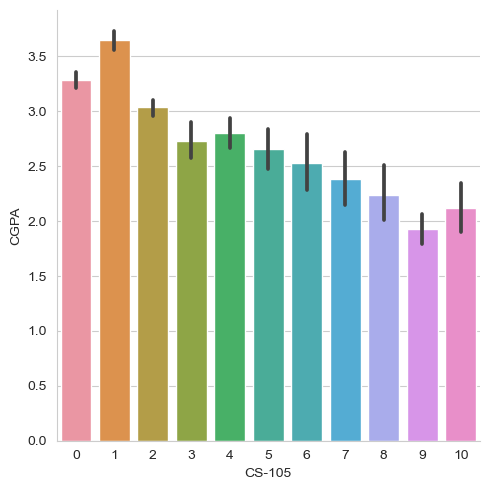

<Figure size 600x400 with 0 Axes>

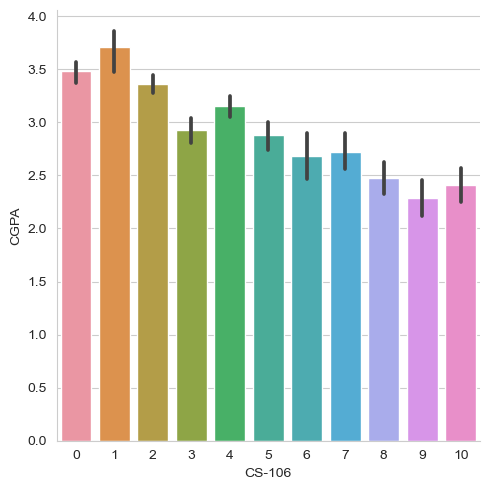

<Figure size 600x400 with 0 Axes>

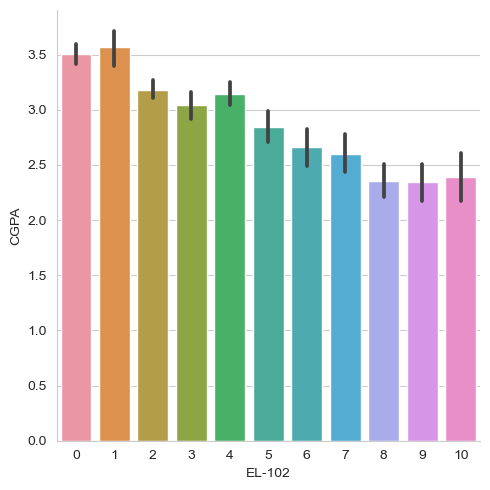

<Figure size 600x400 with 0 Axes>

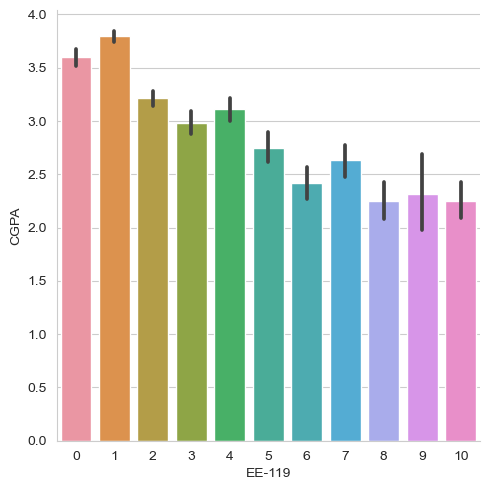

<Figure size 600x400 with 0 Axes>

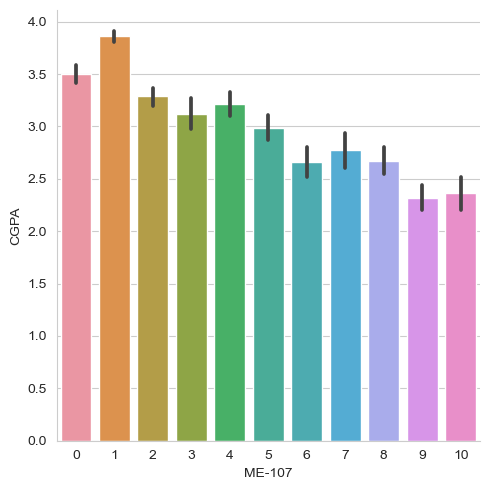

<Figure size 600x400 with 0 Axes>

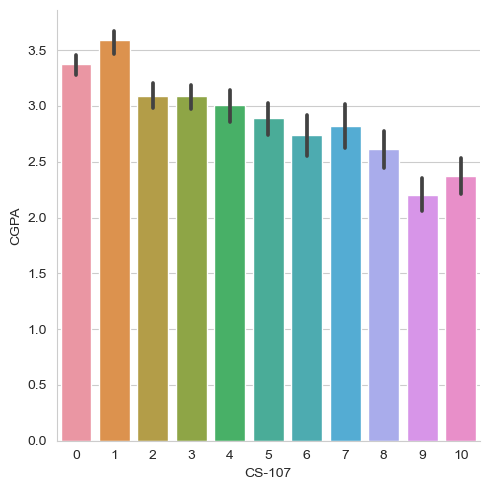

<Figure size 600x400 with 0 Axes>

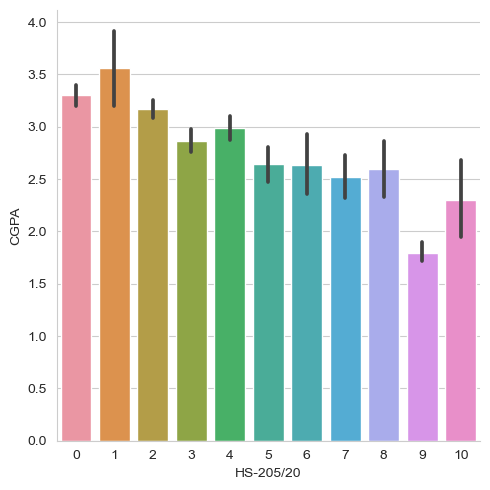

<Figure size 600x400 with 0 Axes>

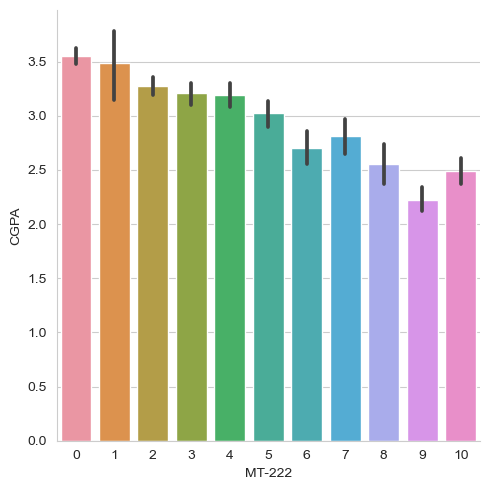

<Figure size 600x400 with 0 Axes>

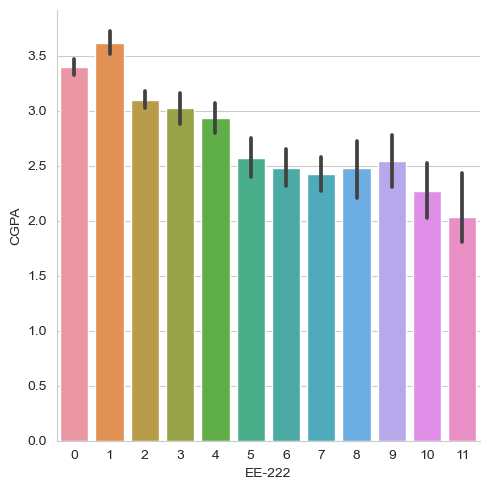

<Figure size 600x400 with 0 Axes>

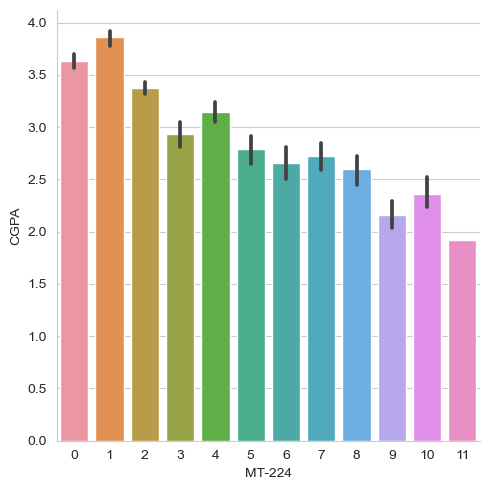

<Figure size 600x400 with 0 Axes>

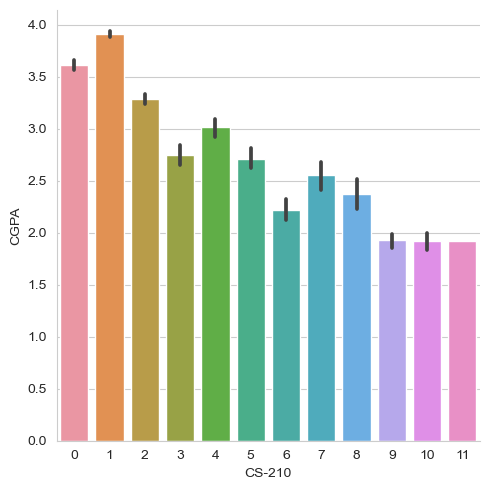

<Figure size 600x400 with 0 Axes>

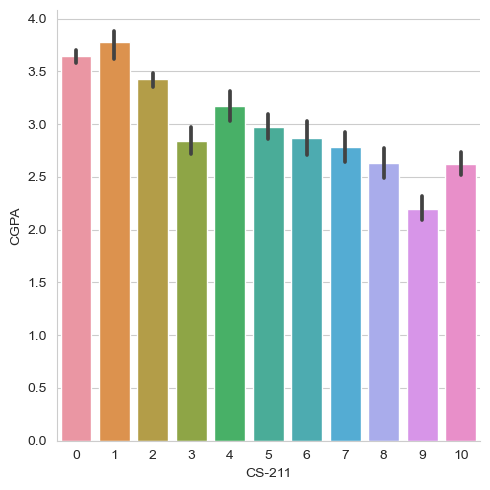

<Figure size 600x400 with 0 Axes>

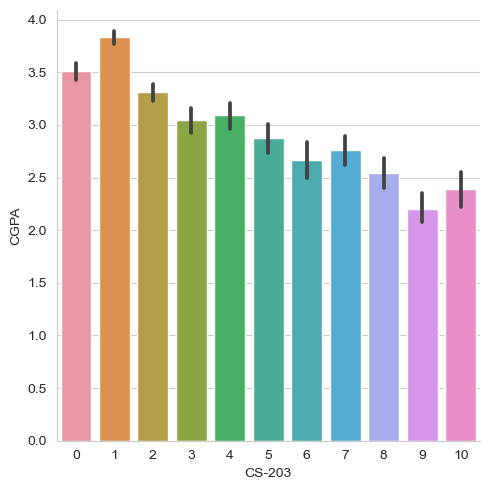

<Figure size 600x400 with 0 Axes>

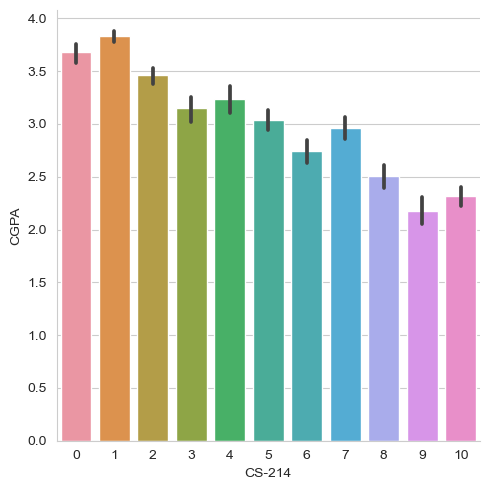

<Figure size 600x400 with 0 Axes>

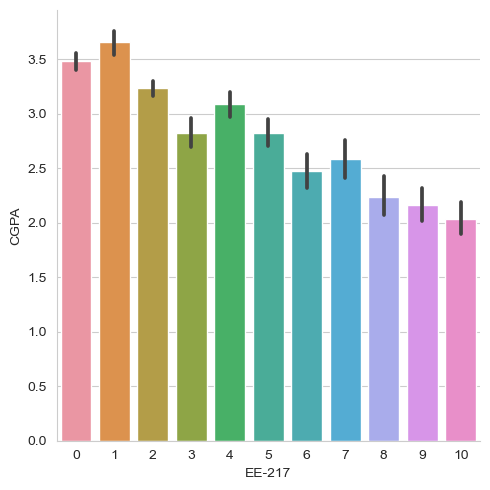

<Figure size 600x400 with 0 Axes>

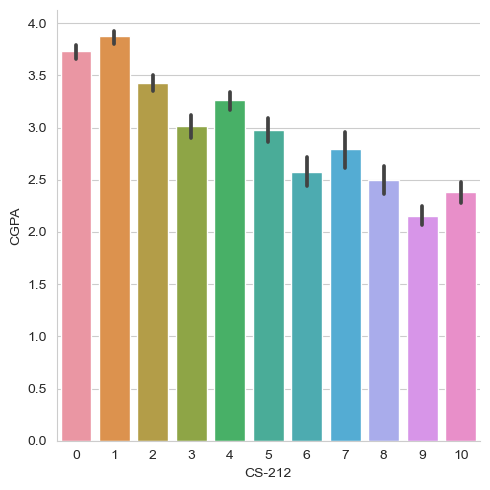

<Figure size 600x400 with 0 Axes>

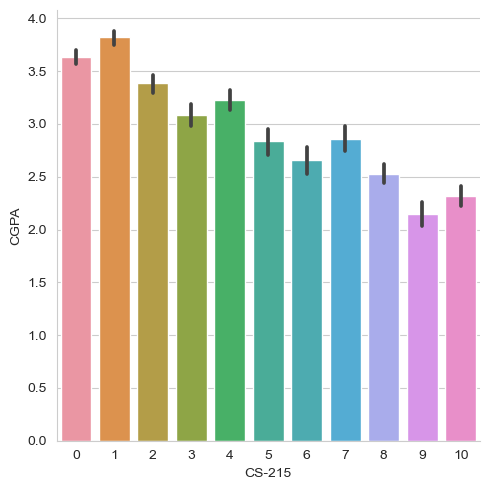

<Figure size 600x400 with 0 Axes>

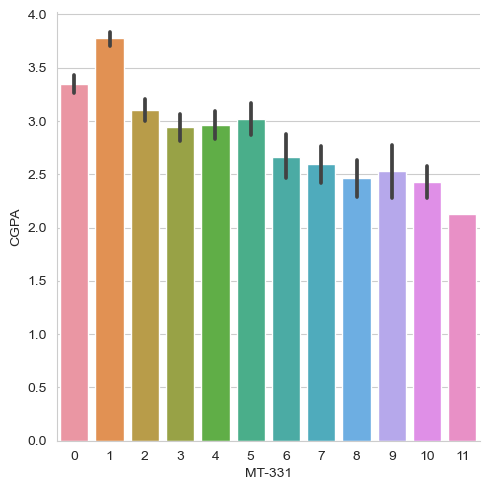

<Figure size 600x400 with 0 Axes>

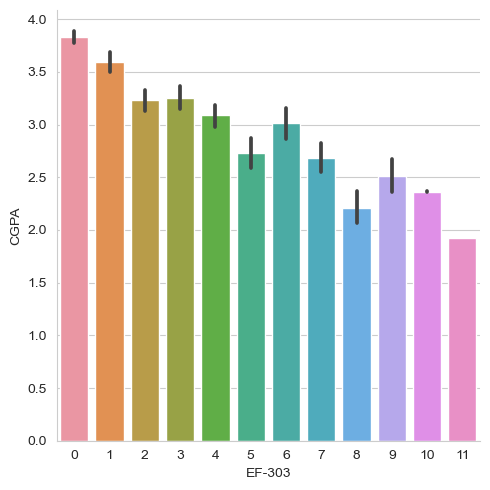

<Figure size 600x400 with 0 Axes>

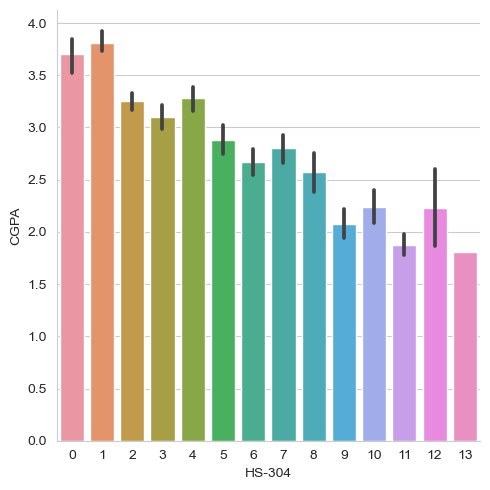

<Figure size 600x400 with 0 Axes>

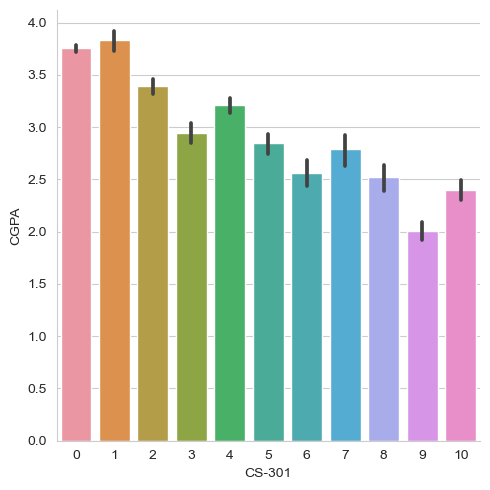

<Figure size 600x400 with 0 Axes>

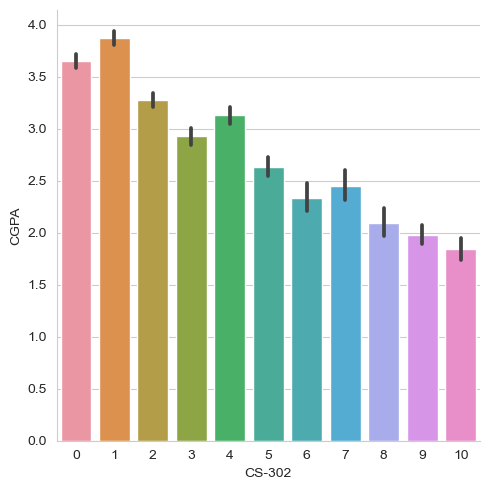

<Figure size 600x400 with 0 Axes>

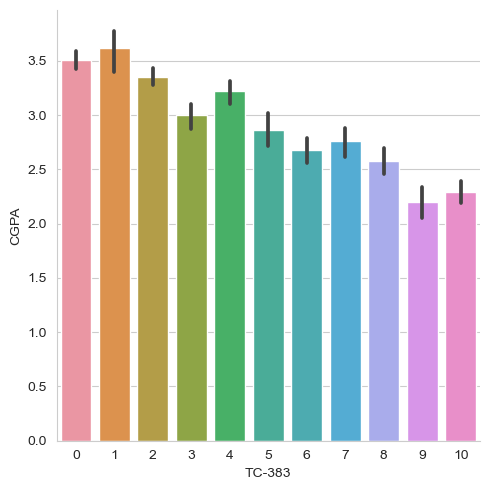

<Figure size 600x400 with 0 Axes>

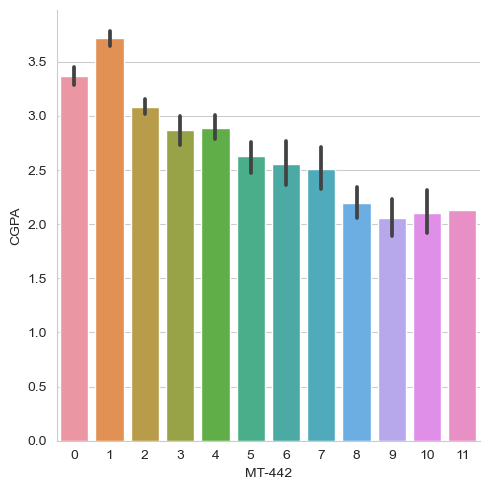

<Figure size 600x400 with 0 Axes>

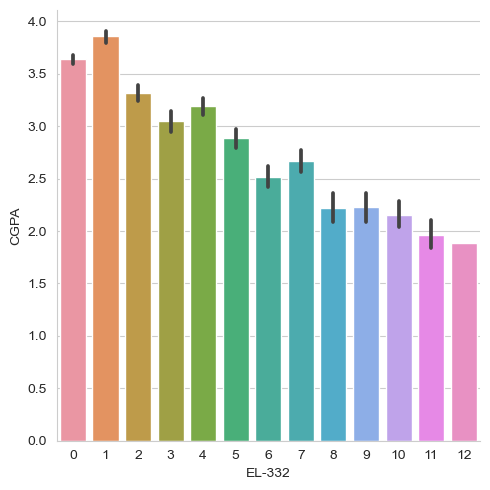

<Figure size 600x400 with 0 Axes>

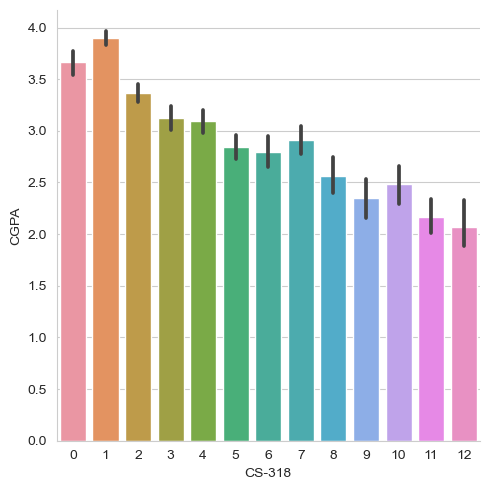

<Figure size 600x400 with 0 Axes>

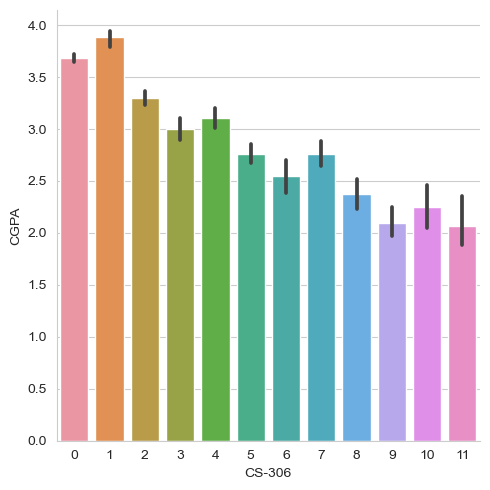

<Figure size 600x400 with 0 Axes>

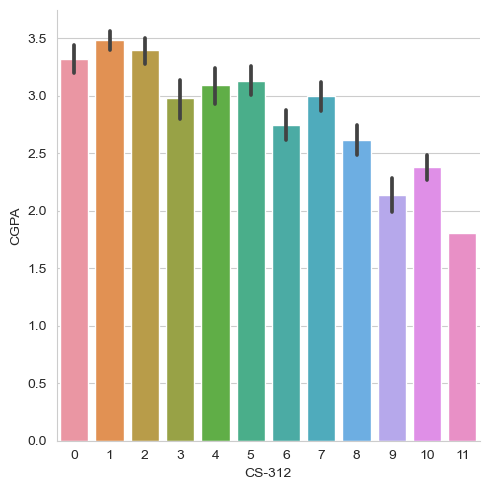

<Figure size 600x400 with 0 Axes>

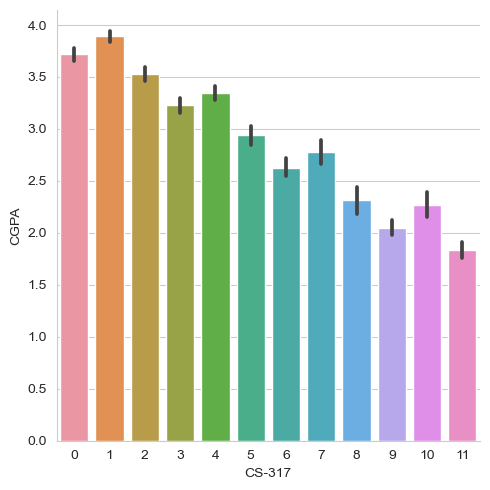

<Figure size 600x400 with 0 Axes>

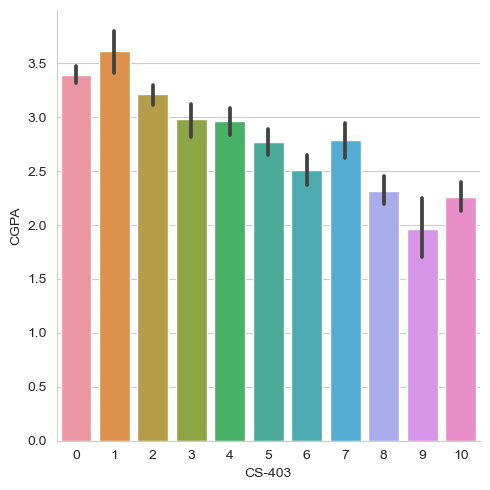

<Figure size 600x400 with 0 Axes>

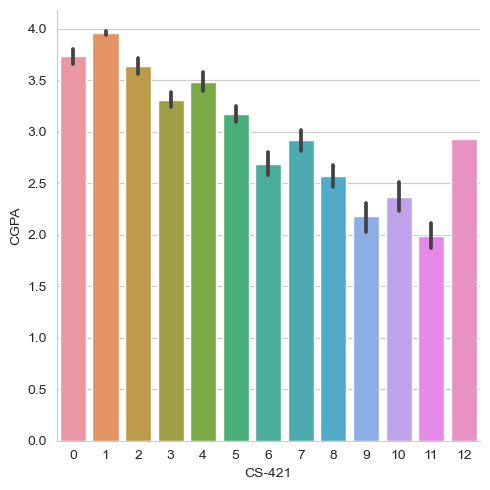

<Figure size 600x400 with 0 Axes>

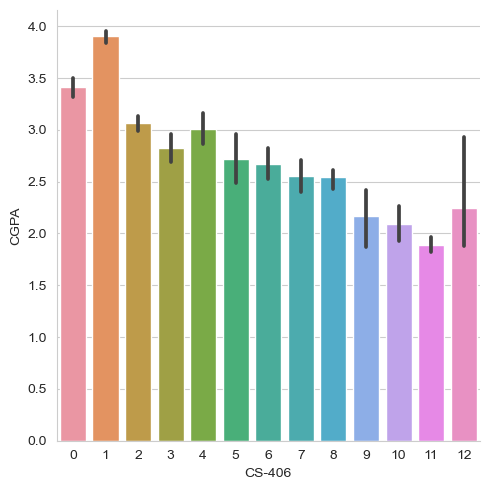

<Figure size 600x400 with 0 Axes>

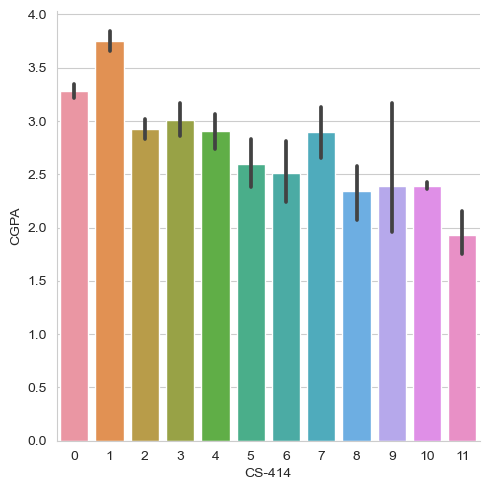

<Figure size 600x400 with 0 Axes>

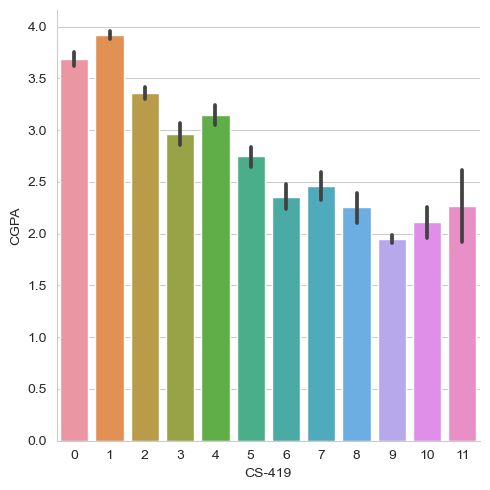

<Figure size 600x400 with 0 Axes>

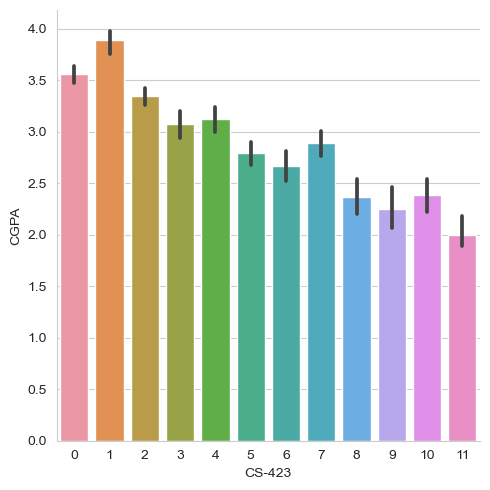

<Figure size 600x400 with 0 Axes>

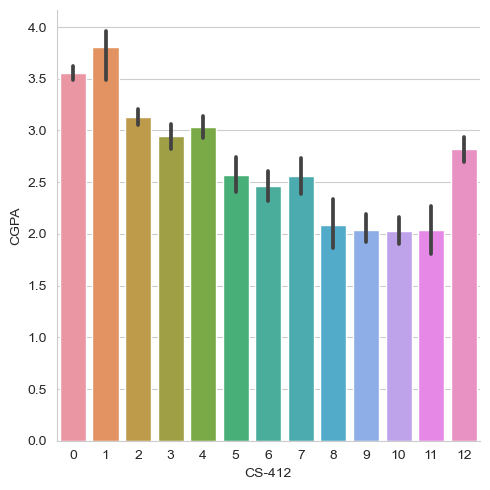

In [65]:
# plot graph for co-relation in Bi Variate Analysis
for col in df.drop(['CGPA'],axis=1):
    plt.figure(figsize=(6,4))
    sns.catplot(x=col,y='CGPA',data=df,kind='bar')
    plt.show()

As we observe in each columns for getting high CGPA you have to get grade 0 and 1 if you are get 0 and 1 grade in all subject means your CGPA is high by getting 1 grade in all subject you CGPA is very fabulous.

Rest of are avarage Grade and Avarage CGPA.

Now our bivariate analysis is completed now we start with the multivariate analysis.

# Multivariate analysis

In [66]:
df.corr()

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105  \
PH-121     1.000000  0.323066  0.494427   0.463173  0.488824  0.560263   
HS-101     0.323066  1.000000  0.272316   0.435780  0.414580  0.346198   
CY-105     0.494427  0.272316  1.000000   0.462325  0.536577  0.518304   
HS-105/12  0.463173  0.435780  0.462325   1.000000  0.465323  0.486259   
MT-111     0.488824  0.414580  0.536577   0.465323  1.000000  0.398982   
CS-105     0.560263  0.346198  0.518304   0.486259  0.398982  1.000000   
CS-106     0.338011  0.326793  0.405403   0.519325  0.506887  0.352622   
EL-102     0.418576  0.309384  0.398148   0.304581  0.518005  0.339240   
EE-119     0.547267  0.252908  0.428192   0.387393  0.399608  0.467687   
ME-107     0.500376  0.285959  0.414513   0.271929  0.466903  0.386427   
CS-107     0.446271  0.494585  0.378195   0.510013  0.452407  0.485507   
HS-205/20  0.257875  0.150906  0.184776   0.101059  0.284162  0.139331   
MT-222     0.577236  0.386156  0.491115   0.459034  0.531391  0.482416   
EE-222     0.545584  0.399303  0.354608   0.363331  0.406377  0.486819   
MT-224     0.413540  0.266753  0.491124   0.403391  0.569765  0.292964   
CS-210     0.550760  0.319914  0.512905   0.458906  0.585618  0.469052   
CS-211     0.336716  0.317247  0.466097   0.343521  0.554668  0.322979   
CS-203     0.465999  0.243613  0.357225   0.249693  0.520620  0.402028   
CS-214     0.427793  0.455791  0.448436   0.395914  0.580520  0.416959   
EE-217     0.468479  0.333035  0.383555   0.331327  0.515483  0.346716   
CS-212     0.414539  0.347462  0.500533   0.492353  0.595947  0.385937   
CS-215     0.483678  0.374895  0.511379   0.432157  0.590041  0.428852   
MT-331     0.218023  0.167228  0.403005   0.264327  0.454896  0.257080   
EF-303     0.291030  0.280737  0.436073   0.444258  0.445453  0.278175   
HS-304     0.409765  0.427311  0.291490   0.322533  0.321894  0.442703   
CS-301     0.383814  0.332315  0.460760   0.450777  0.579940  0.311360   
CS-302     0.517771  0.400694  0.495862   0.437302  0.549470  0.491339   
TC-383     0.321976  0.389318  0.425018   0.494921  0.569526  0.311778   
MT-442     0.492891  0.238691  0.452141   0.333475  0.461332  0.425558   
EL-332     0.489920  0.405694  0.362562   0.370021  0.629536  0.381029   
CS-318     0.436081  0.423278  0.298470   0.378623  0.428112  0.464323   
CS-306     0.526457  0.451670  0.359548   0.481792  0.488059  0.447651   
CS-312     0.203851  0.275325  0.432954   0.357368  0.553874  0.203086   
CS-317     0.496327  0.357484  0.484175   0.476096  0.565753  0.396590   
CS-403     0.359893  0.223268  0.536897   0.486139  0.470035  0.319895   
CS-421     0.402897  0.316998  0.451631   0.468202  0.567948  0.321947   
CS-406     0.256171  0.251735  0.053646   0.124534  0.298054  0.198786   
CS-414     0.208464  0.231350 -0.002121   0.135973  0.209518  0.168166   
CS-419     0.490646  0.290317  0.480473   0.484889  0.555659  0.342625   
CS-423     0.229941  0.280221  0.225588   0.292651  0.450260  0.149531   
CS-412     0.461298  0.285751  0.162221   0.213891  0.322032  0.311282   
CGPA      -0.654447 -0.508593 -0.619040  -0.593464 -0.746202 -0.582267   

             CS-106    EL-102    EE-119    ME-107  ...    CS-312    CS-317  \
PH-121     0.338011  0.418576  0.547267  0.500376  ...  0.203851  0.496327   
HS-101     0.326793  0.309384  0.252908  0.285959  ...  0.275325  0.357484   
CY-105     0.405403  0.398148  0.428192  0.414513  ...  0.432954  0.484175   
HS-105/12  0.519325  0.304581  0.387393  0.271929  ...  0.357368  0.476096   
MT-111     0.506887  0.518005  0.399608  0.466903  ...  0.553874  0.565753   
CS-105     0.352622  0.339240  0.467687  0.386427  ...  0.203086  0.396590   
CS-106     1.000000  0.332422  0.325789  0.324454  ...  0.502511  0.449218   
EL-102     0.332422  1.000000  0.430653  0.456315  ...  0.382415  0.474906   
EE-119     0.325789  0.430653  1.000000  0.526683  ...  0.257804  0.457205   
ME-107     0.324454  0.456315  0.526683  1.000000 

<AxesSubplot:>

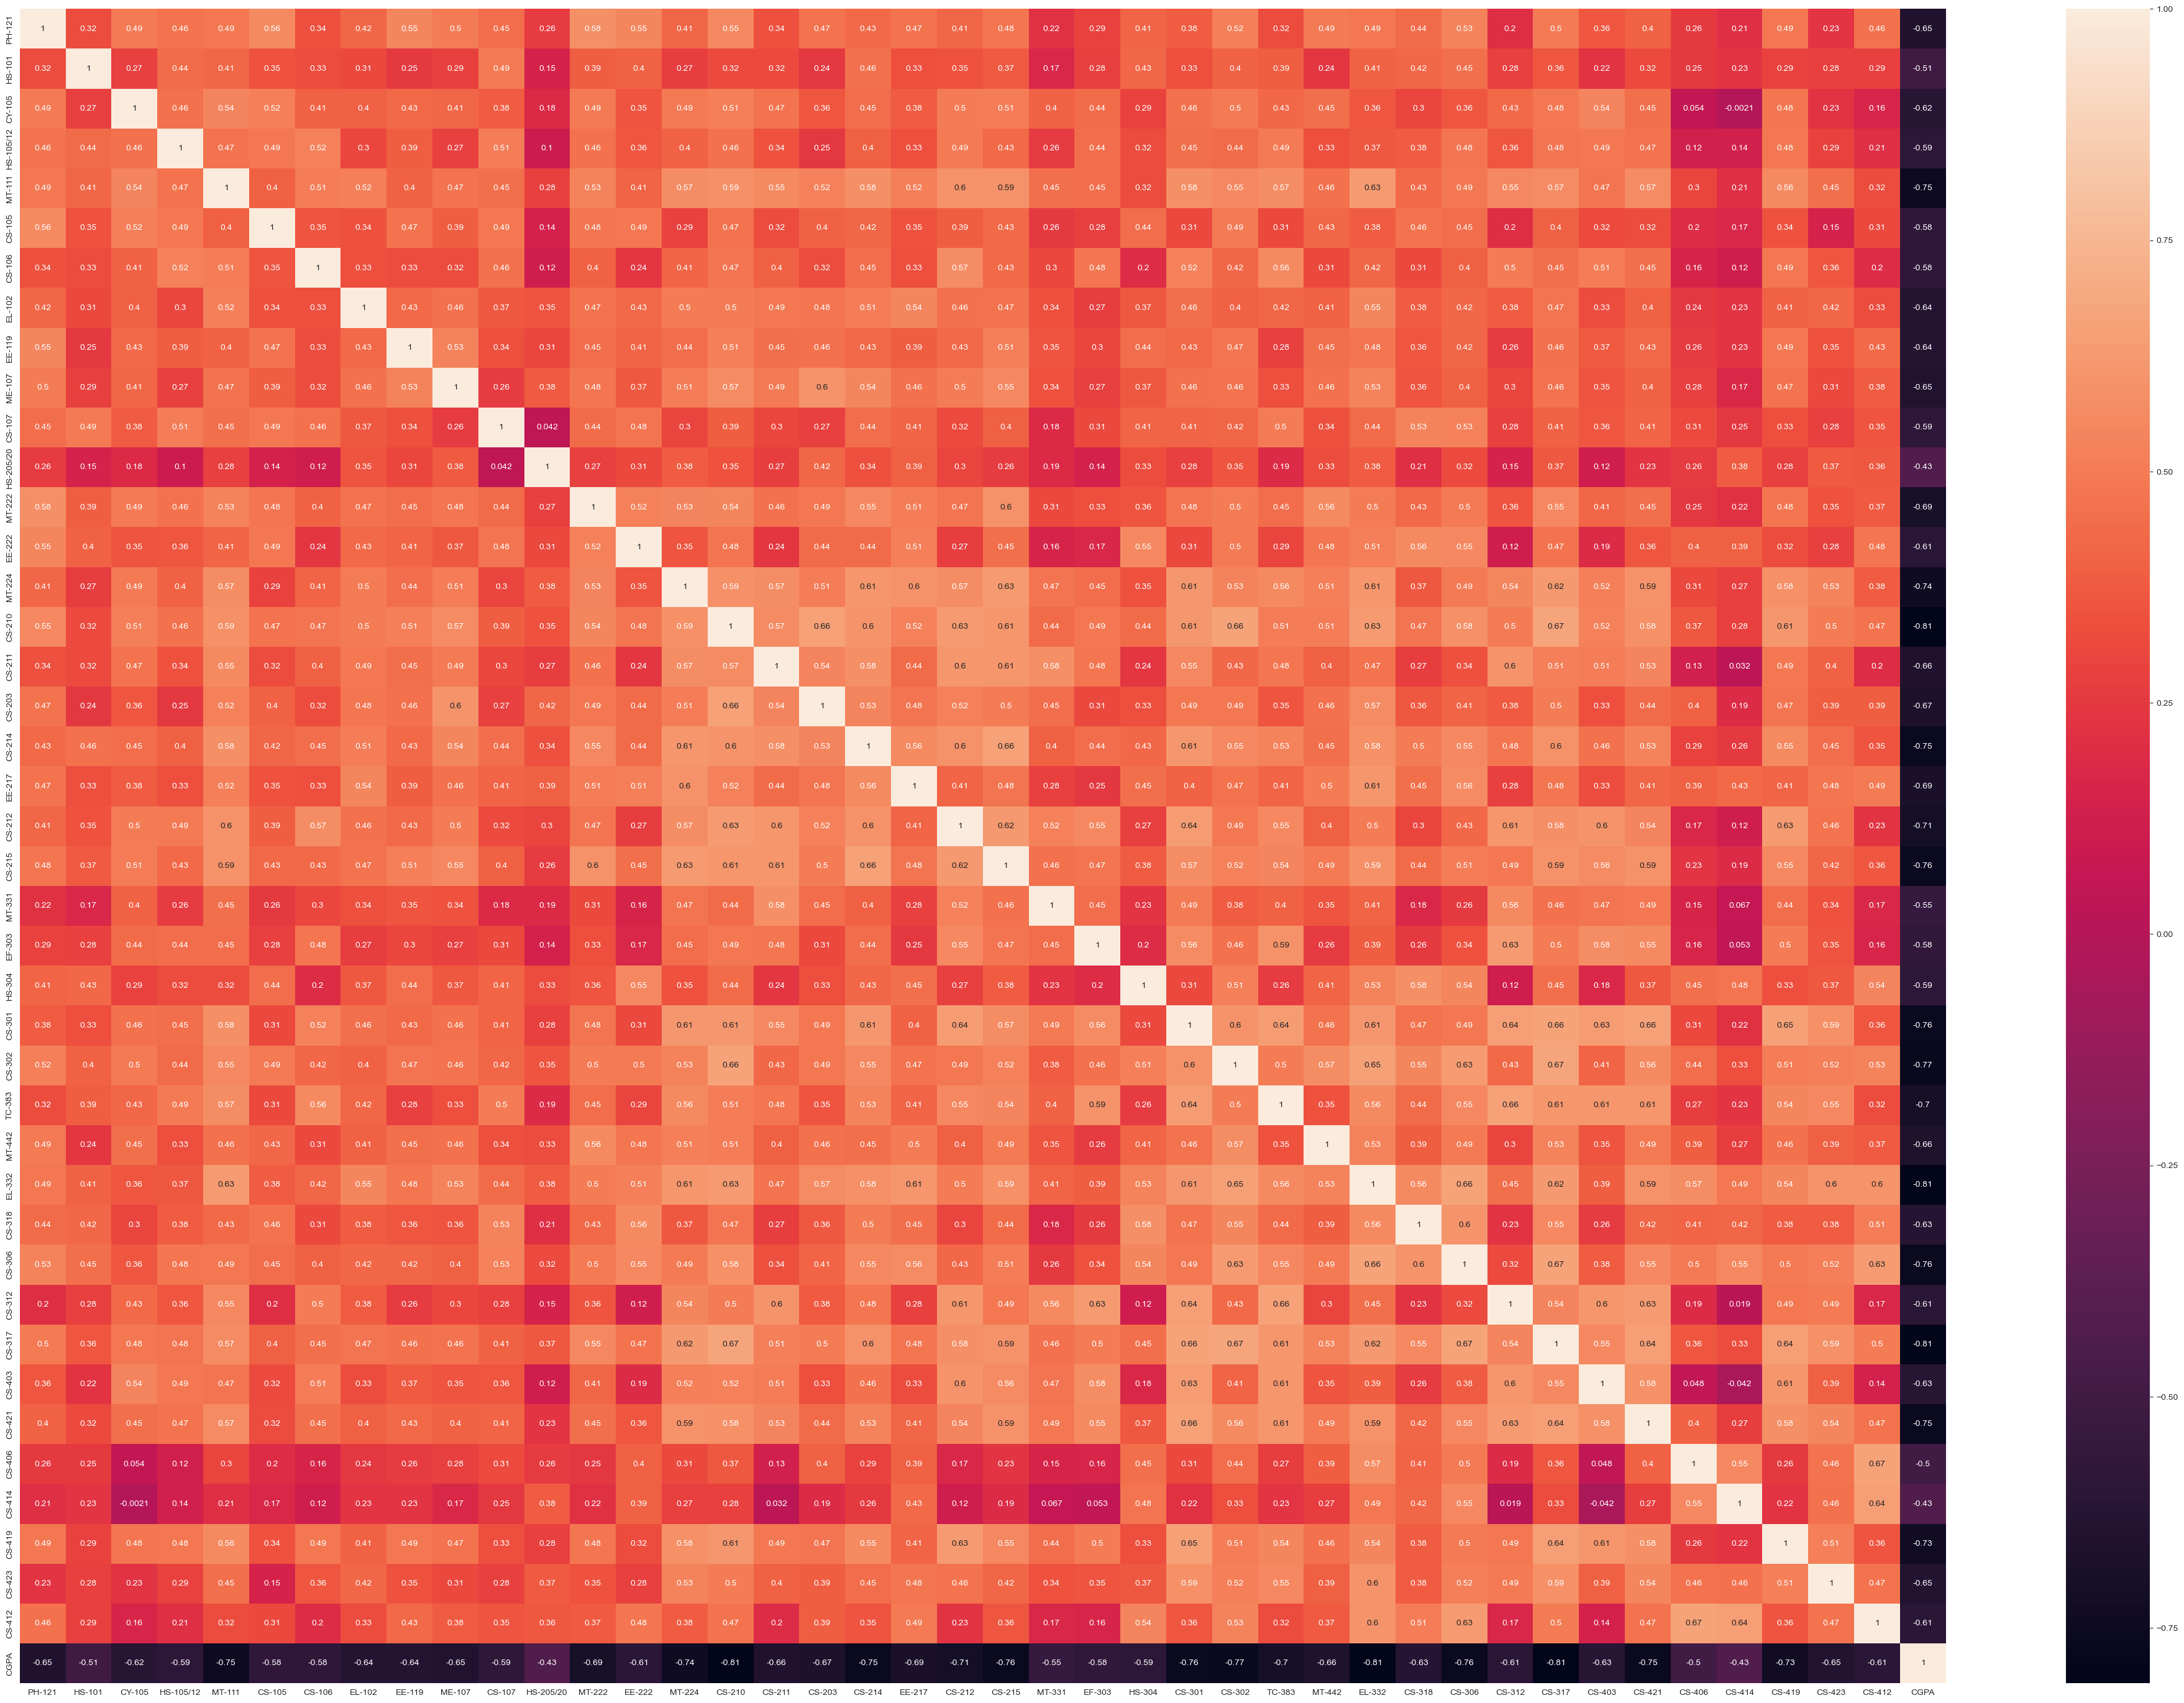

In [67]:
plt.figure(figsize=(50,35))
sns.heatmap(df.corr(),annot=True)

In [68]:
df.drop(['CGPA'],axis=1).corr()

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105  \
PH-121     1.000000  0.323066  0.494427   0.463173  0.488824  0.560263   
HS-101     0.323066  1.000000  0.272316   0.435780  0.414580  0.346198   
CY-105     0.494427  0.272316  1.000000   0.462325  0.536577  0.518304   
HS-105/12  0.463173  0.435780  0.462325   1.000000  0.465323  0.486259   
MT-111     0.488824  0.414580  0.536577   0.465323  1.000000  0.398982   
CS-105     0.560263  0.346198  0.518304   0.486259  0.398982  1.000000   
CS-106     0.338011  0.326793  0.405403   0.519325  0.506887  0.352622   
EL-102     0.418576  0.309384  0.398148   0.304581  0.518005  0.339240   
EE-119     0.547267  0.252908  0.428192   0.387393  0.399608  0.467687   
ME-107     0.500376  0.285959  0.414513   0.271929  0.466903  0.386427   
CS-107     0.446271  0.494585  0.378195   0.510013  0.452407  0.485507   
HS-205/20  0.257875  0.150906  0.184776   0.101059  0.284162  0.139331   
MT-222     0.577236  0.386156  0.491115   0.459034  0.531391  0.482416   
EE-222     0.545584  0.399303  0.354608   0.363331  0.406377  0.486819   
MT-224     0.413540  0.266753  0.491124   0.403391  0.569765  0.292964   
CS-210     0.550760  0.319914  0.512905   0.458906  0.585618  0.469052   
CS-211     0.336716  0.317247  0.466097   0.343521  0.554668  0.322979   
CS-203     0.465999  0.243613  0.357225   0.249693  0.520620  0.402028   
CS-214     0.427793  0.455791  0.448436   0.395914  0.580520  0.416959   
EE-217     0.468479  0.333035  0.383555   0.331327  0.515483  0.346716   
CS-212     0.414539  0.347462  0.500533   0.492353  0.595947  0.385937   
CS-215     0.483678  0.374895  0.511379   0.432157  0.590041  0.428852   
MT-331     0.218023  0.167228  0.403005   0.264327  0.454896  0.257080   
EF-303     0.291030  0.280737  0.436073   0.444258  0.445453  0.278175   
HS-304     0.409765  0.427311  0.291490   0.322533  0.321894  0.442703   
CS-301     0.383814  0.332315  0.460760   0.450777  0.579940  0.311360   
CS-302     0.517771  0.400694  0.495862   0.437302  0.549470  0.491339   
TC-383     0.321976  0.389318  0.425018   0.494921  0.569526  0.311778   
MT-442     0.492891  0.238691  0.452141   0.333475  0.461332  0.425558   
EL-332     0.489920  0.405694  0.362562   0.370021  0.629536  0.381029   
CS-318     0.436081  0.423278  0.298470   0.378623  0.428112  0.464323   
CS-306     0.526457  0.451670  0.359548   0.481792  0.488059  0.447651   
CS-312     0.203851  0.275325  0.432954   0.357368  0.553874  0.203086   
CS-317     0.496327  0.357484  0.484175   0.476096  0.565753  0.396590   
CS-403     0.359893  0.223268  0.536897   0.486139  0.470035  0.319895   
CS-421     0.402897  0.316998  0.451631   0.468202  0.567948  0.321947   
CS-406     0.256171  0.251735  0.053646   0.124534  0.298054  0.198786   
CS-414     0.208464  0.231350 -0.002121   0.135973  0.209518  0.168166   
CS-419     0.490646  0.290317  0.480473   0.484889  0.555659  0.342625   
CS-423     0.229941  0.280221  0.225588   0.292651  0.450260  0.149531   
CS-412     0.461298  0.285751  0.162221   0.213891  0.322032  0.311282   

             CS-106    EL-102    EE-119    ME-107  ...    CS-306    CS-312  \
PH-121     0.338011  0.418576  0.547267  0.500376  ...  0.526457  0.203851   
HS-101     0.326793  0.309384  0.252908  0.285959  ...  0.451670  0.275325   
CY-105     0.405403  0.398148  0.428192  0.414513  ...  0.359548  0.432954   
HS-105/12  0.519325  0.304581  0.387393  0.271929  ...  0.481792  0.357368   
MT-111     0.506887  0.518005  0.399608  0.466903  ...  0.488059  0.553874   
CS-105     0.352622  0.339240  0.467687  0.386427  ...  0.447651  0.203086   
CS-106     1.000000  0.332422  0.325789  0.324454  ...  0.397639  0.502511   
EL-102     0.332422  1.000000  0.430653  0.456315  ...  0.424579  0.382415   
EE-119     0.325789  0.430653  1.000000  0.526683  ...  0.417352  0.257804   
ME-107     0.324454  0.456315  0.526683  1.000000  ...  0.397759  0.300632   
CS-107     0.457838  0.370361  0.338554  0.259

<AxesSubplot:>

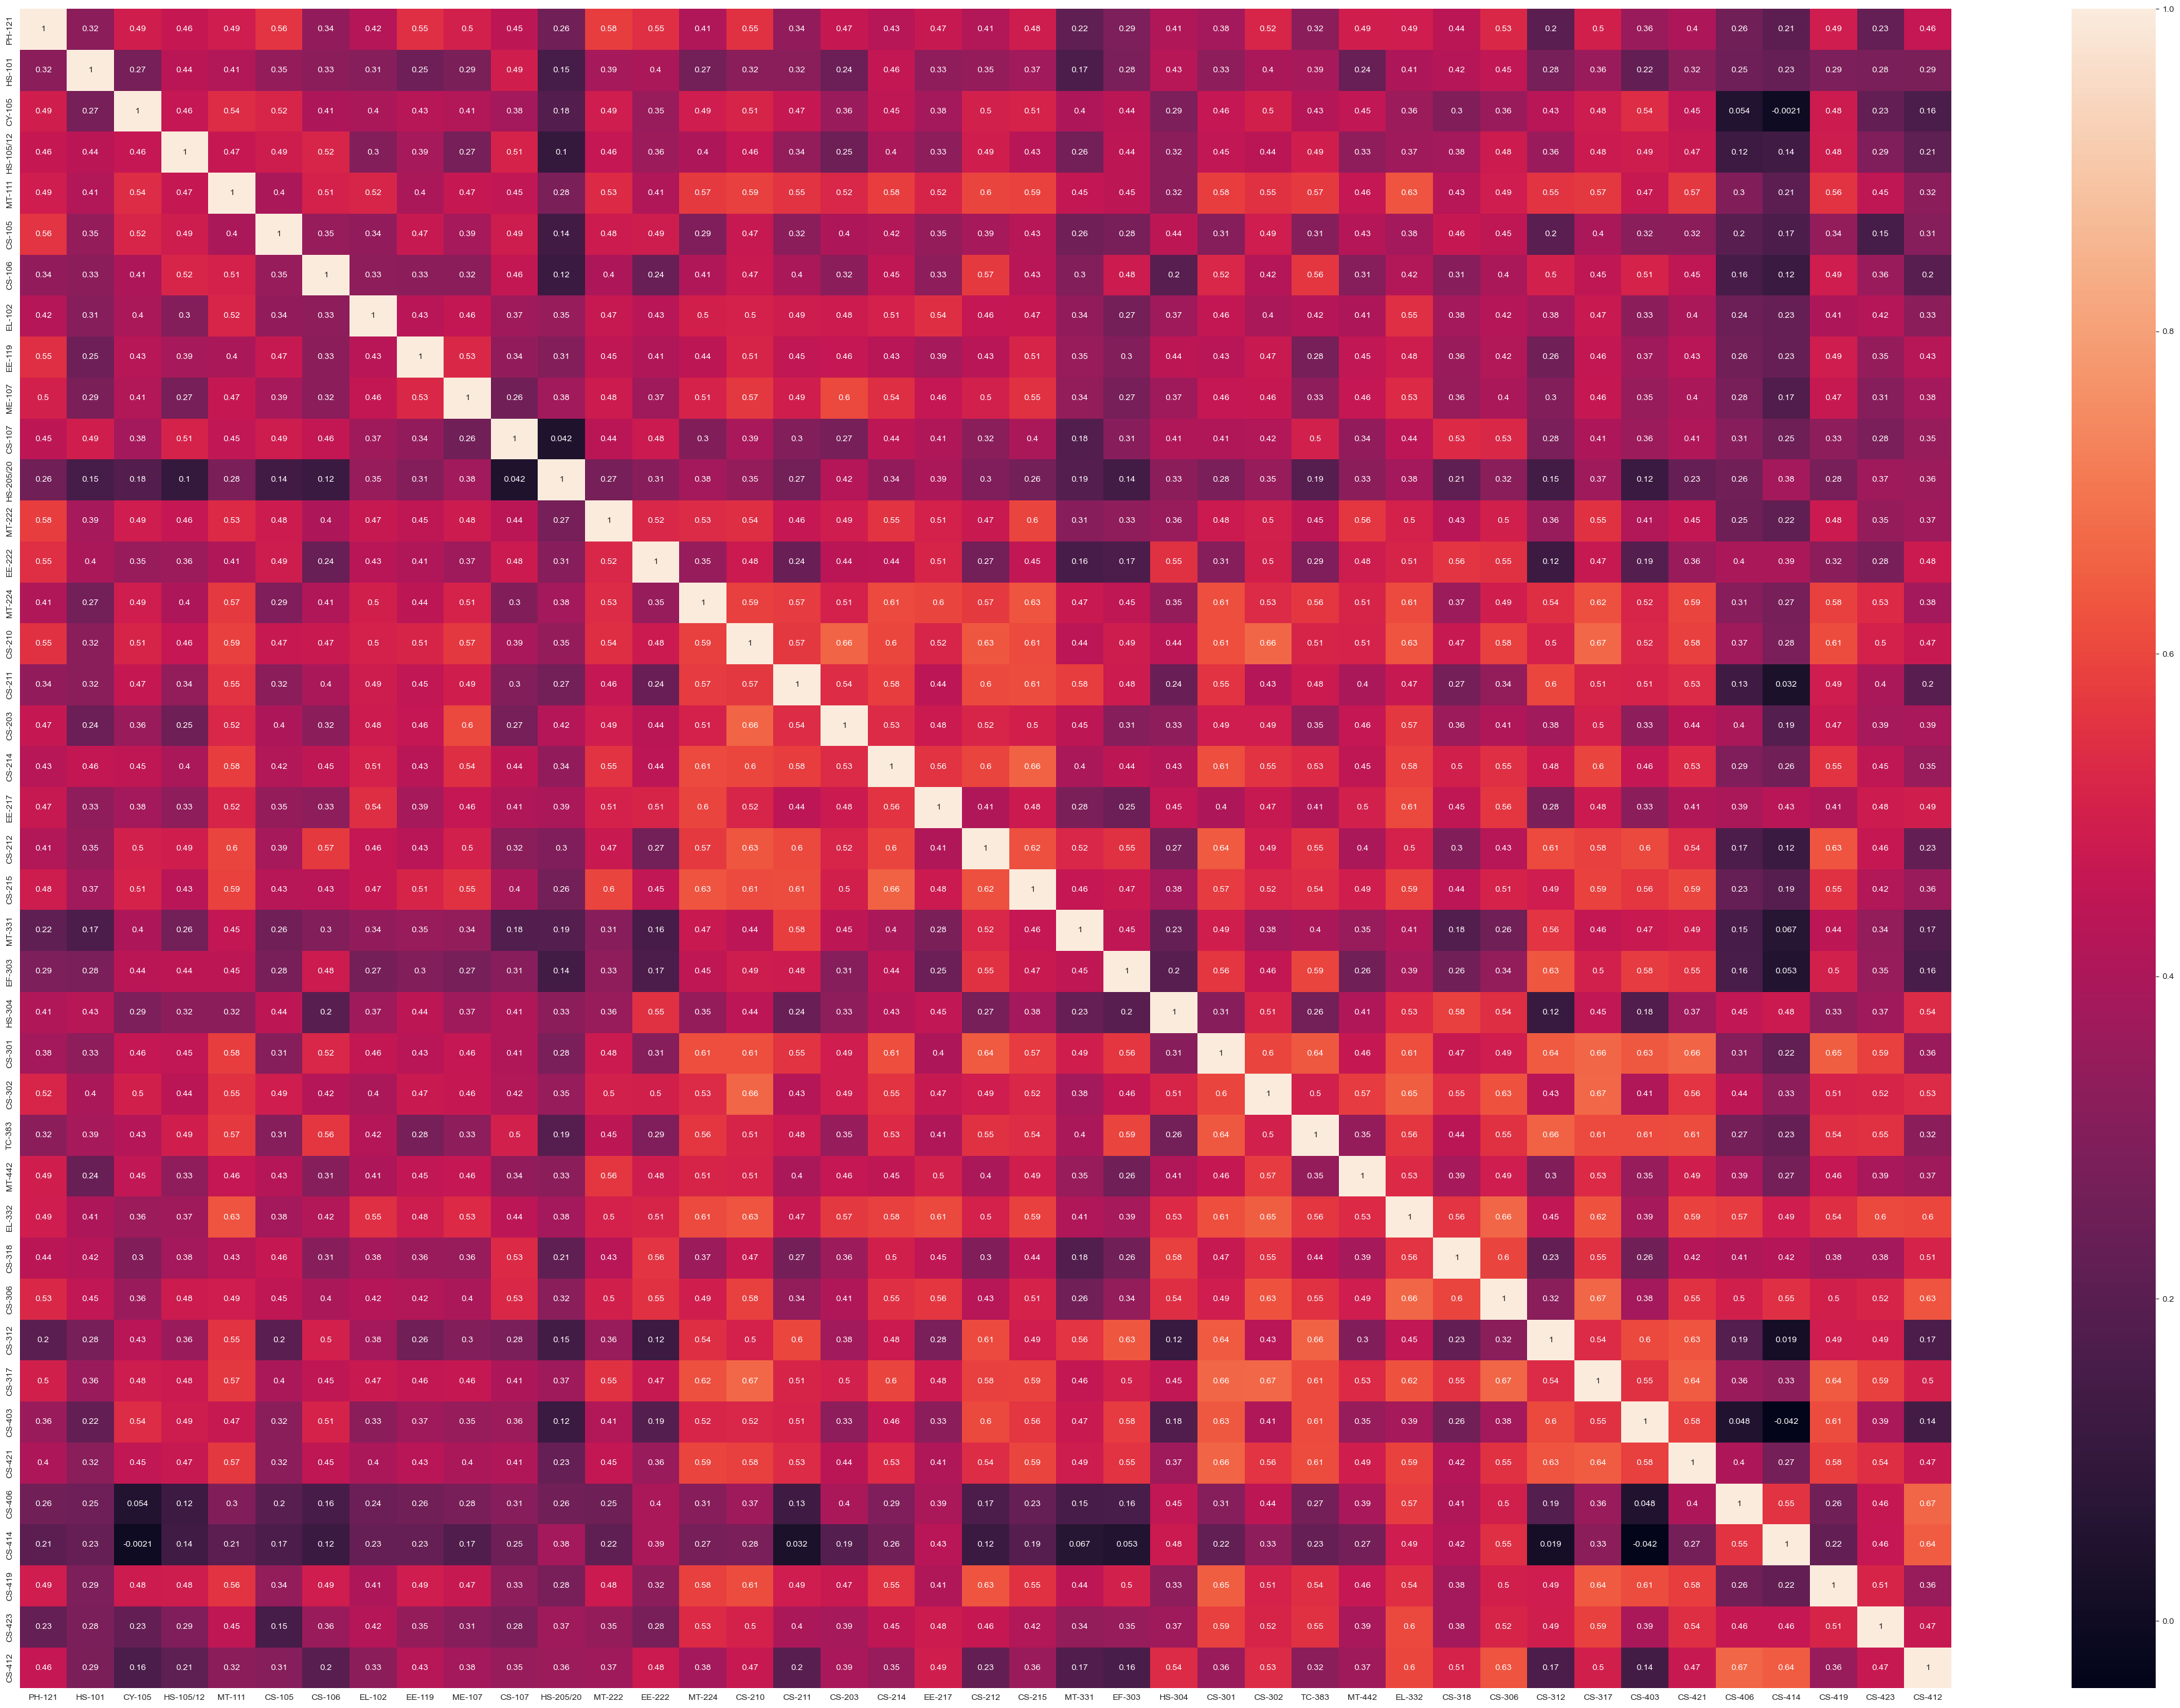

In [69]:
plt.figure(figsize=(50,35))
sns.heatmap(df.drop(['CGPA'],axis=1).corr(),annot=True)

Now we observe that all the columns are majority correlate with each other this is due to because the target variable is our CGPA and CGPA is based on the subjects marks so for that these all are mainly positively correlate with each others.

# check statistical analysis

In [70]:
df.describe()

PH-121      HS-101      CY-105   HS-105/12      MT-111      CS-105  \
count  491.000000  491.000000  491.000000  491.000000  491.000000  491.000000   
mean     3.268839    4.928717    2.507128    4.016293    3.839104    2.441955   
std      2.771028    2.754775    2.654501    3.154482    2.918725    2.434068   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    3.000000    0.000000    1.000000    2.000000    0.000000   
50%      3.000000    5.000000    2.000000    4.000000    3.000000    2.000000   
75%      5.000000    7.000000    4.000000    7.000000    6.000000    4.000000   
max     10.000000   10.000000   10.000000   10.000000   10.000000   10.000000   

           CS-106      EL-102      EE-119      ME-107  ...      CS-312  \
count  491.000000  491.000000  491.000000  491.000000  ...  491.000000   
mean     4.144603    3.851324    3.629328    4.474542  ...    4.433809   
std      2.795307    2.884917    2.501647    3.076717  ...    3.293964   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      2.000000    2.000000    2.000000    2.000000  ...    1.000000   
50%      4.000000    3.000000    3.000000    4.000000  ...    4.000000   
75%      6.000000    6.000000    5.000000    7.000000  ...    7.000000   
max     10.000000   10.000000   10.000000   10.000000  ...   11.000000   

           CS-317      CS-403      CS-421      CS-406      CS-414      CS-419  \
count  491.000000  491.000000  491.000000  491.000000  491.000000  491.000000   
mean     4.731161    3.370672    5.486762    2.812627    2.484725    3.755601   
std      2.753296    2.926493    2.725040    2.402703    2.427157    2.361542   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      3.000000    0.000000    3.000000    2.000000    0.000000    2.000000   
50%      5.000000    3.000000    5.000000    2.000000    2.000000    4.000000   
75%      7.000000    5.000000    8.000000    3.000000    4.000000    5.000000   
max     11.000000   10.000000   12.000000   12.000000   11.000000   11.000000   

           CS-423      CS-412        CGPA  
count  491.000000  491.000000  491.000000  
mean     4.252546    3.199593    3.008090  
std      2.849520    2.442164    0.582833  
min      0.000000    0.000000    1.658000  
25%      2.000000    2.000000    2.604000  
50%      4.000000    3.000000    3.068000  
75%      6.000000    4.000000    3.477000  
max     11.000000   12.000000    3.985000  

[8 rows x 42 columns]

# We have to observe only CGPA because rest of all in object to converted.

Check for outliers in features.
here we have not to check outliers because our feature data is in object type so no need to remove it.
Check for skewness in features.
here we have not to check skewness because our feature data is in object type so no need to remove skewness it.
Now check multicollinearity for independent variables
As we observe or data is object so no need to check multicollinearity.

In [71]:
x=df.drop(['CGPA'],axis=1)
y=df['CGPA']

Scaling input data

In [72]:
#for scaling we use standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.62537305,  1.84278391,  2.07137725, ...,  1.79913274,
        -0.44001211, -0.49170175],
       [-1.18085146,  1.47940764,  2.82558284, ...,  0.95136482,
         0.61387055, -0.08181116],
       [-1.18085146, -0.70084994, -0.94544509, ..., -1.59193895,
        -0.79130633, -1.31148293],
       ...,
       [-0.09711676, -1.79097874, -0.1912395 , ...,  0.10359689,
        -0.79130633, -0.49170175],
       [-1.18085146, -0.33747368,  2.44848004, ..., -0.32028707,
         0.26257633,  1.14786062],
       [ 0.98661795,  1.47940764,  2.44848004, ...,  0.10359689,
         1.66775321,  1.9676418 ]])

Since we observe that our target variable is in float type so we should use regression model.

As we observe in our features columns they are large numbers so we use PCA first train with all columns and then use pca and compare both then deside which one is best.

In [73]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [74]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model perform very well')
        print('Random State = ',i)
        print("Training r2_score is = ",r2_score(y_train,pred_train))
        print("Test r2_score is = ",r2_score(y_test,pred_test))
        print('\n')

At random state 6 The model perform very well
Random State =  6
Training r2_score is =  0.9905485778258621
Test r2_score is =  0.9914696119030788


At random state 13 The model perform very well
Random State =  13
Training r2_score is =  0.9907282318647502
Test r2_score is =  0.9911088419480222


At random state 14 The model perform very well
Random State =  14
Training r2_score is =  0.9906189924330218
Test r2_score is =  0.9905652520094314


At random state 15 The model perform very well
Random State =  15
Training r2_score is =  0.990711743719622
Test r2_score is =  0.9910718035668293


At random state 17 The model perform very well
Random State =  17
Training r2_score is =  0.9907608121267791
Test r2_score is =  0.9905425879815658


At random state 24 The model perform very well
Random State =  24
Training r2_score is =  0.9906022954313796
Test r2_score is =  0.9910791311707691


At random state 28 The model perform very well
Random State =  28
Training r2_score is =  0.99084380512

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=348,test_size=0.25)

In [76]:
lr.fit(x_train,y_train)
pred_test_lr=lr.predict(x_test)
print("r2_score is = ",r2_score(y_test,pred_test_lr)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_lr))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_lr))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_lr)))

r2_score is =  98.98205108083637
mean_absolute_error =  0.04318602851017986
mean_squared_error =  0.003282689322088025
root_mean_squared_error =  0.057294758242687656


In [77]:
from sklearn.model_selection import cross_val_score
pred_lr_ac=r2_score(y_test,pred_test_lr)
for i in range(2,15):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_lr_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 98.197669641024
Accuracy score is = 98.98205108083637


At cv = 3
Cross validation score is = 98.47756043596604
Accuracy score is = 98.98205108083637


At cv = 4
Cross validation score is = 98.57160957950099
Accuracy score is = 98.98205108083637


At cv = 5
Cross validation score is = 98.72706707104328
Accuracy score is = 98.98205108083637


At cv = 6
Cross validation score is = 98.75702284918727
Accuracy score is = 98.98205108083637


At cv = 7
Cross validation score is = 98.6448328607622
Accuracy score is = 98.98205108083637


At cv = 8
Cross validation score is = 98.79005640588822
Accuracy score is = 98.98205108083637


At cv = 9
Cross validation score is = 98.75872556609949
Accuracy score is = 98.98205108083637


At cv = 10
Cross validation score is = 98.82256510639242
Accuracy score is = 98.98205108083637


At cv = 11
Cross validation score is = 98.83308578406094
Accuracy score is = 98.98205108083637


At cv = 12
Cross validation score is = 98

In [78]:
lsscore_selected=cross_val_score(lr,x,y,cv=11)
print('Cross validation score =',lsscore_selected.mean()*100,'\n','r2_score =',pred_lr_ac*100)

Cross validation score = 98.83308578406094 
 r2_score = 98.98205108083637


In [79]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [80]:
gb=GradientBoostingRegressor()
ada=AdaBoostRegressor()
rfc=RandomForestRegressor()
svc=SVR()
dtc=DecisionTreeRegressor()
knn=KNeighborsRegressor()

In [81]:
# GradientBoostingRegressor
gb.fit(x_train,y_train)
pred_test_gb=gb.predict(x_test)
print("r2_score is = ",r2_score(y_test,pred_test_gb)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_gb))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_gb))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_gb)))

r2_score is =  95.79912824260913
mean_absolute_error =  0.08825185507214361
mean_squared_error =  0.013547002803223771
root_mean_squared_error =  0.11639159249371825


In [82]:
pred_gb_ac=r2_score(y_test,pred_test_gb)
for i in range(2,15):
    lsscore=cross_val_score(gb,x,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_gb_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 92.83480872840148
Accuracy score is = 95.79912824260913


At cv = 3
Cross validation score is = 95.44931619632821
Accuracy score is = 95.79912824260913


At cv = 4
Cross validation score is = 95.51542336748693
Accuracy score is = 95.79912824260913


At cv = 5
Cross validation score is = 96.25810629811401
Accuracy score is = 95.79912824260913


At cv = 6
Cross validation score is = 96.3775216462606
Accuracy score is = 95.79912824260913


At cv = 7
Cross validation score is = 96.05297964120882
Accuracy score is = 95.79912824260913


At cv = 8
Cross validation score is = 96.35908425292399
Accuracy score is = 95.79912824260913


At cv = 9
Cross validation score is = 96.11599247380273
Accuracy score is = 95.79912824260913


At cv = 10
Cross validation score is = 96.51323066426009
Accuracy score is = 95.79912824260913


At cv = 11
Cross validation score is = 96.45332647353226
Accuracy score is = 95.79912824260913


At cv = 12
Cross validation score is = 

In [83]:
lsscore_selected=cross_val_score(gb,x,y,cv=8)
print('Cross validation score =',lsscore_selected.mean()*100,'\n','r2_score =',pred_gb_ac*100)

Cross validation score = 96.33157215454553 
 r2_score = 95.79912824260913


In [84]:
# AdaBoostRegressor
ada.fit(x_train,y_train)
pred_test_ada=ada.predict(x_test)
print("r2_score is = ",r2_score(y_test,pred_test_ada)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_ada))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_ada))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_ada)))

r2_score is =  92.71742660524586
mean_absolute_error =  0.1242585640011143
mean_squared_error =  0.02348489739536638
root_mean_squared_error =  0.1532478299858317


In [85]:
pred_ada_ac=r2_score(y_test,pred_test_ada)
for i in range(2,15):
    lsscore=cross_val_score(ada,x,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_ada_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 87.8564401039019
Accuracy score is = 92.71742660524586


At cv = 3
Cross validation score is = 90.78269507035426
Accuracy score is = 92.71742660524586


At cv = 4
Cross validation score is = 89.44891097213763
Accuracy score is = 92.71742660524586


At cv = 5
Cross validation score is = 91.66423666084386
Accuracy score is = 92.71742660524586


At cv = 6
Cross validation score is = 91.25594618522439
Accuracy score is = 92.71742660524586


At cv = 7
Cross validation score is = 91.13713003435538
Accuracy score is = 92.71742660524586


At cv = 8
Cross validation score is = 91.31192967516284
Accuracy score is = 92.71742660524586


At cv = 9
Cross validation score is = 91.88975975109624
Accuracy score is = 92.71742660524586


At cv = 10
Cross validation score is = 91.90276587592498
Accuracy score is = 92.71742660524586


At cv = 11
Cross validation score is = 91.69782731146746
Accuracy score is = 92.71742660524586


At cv = 12
Cross validation score is = 

In [86]:
lsscore_selected=cross_val_score(ada,x,y,cv=14)
print('Cross validation score =',lsscore_selected.mean()*100,'\n','r2_score =',pred_ada_ac*100)

Cross validation score = 91.5730257395145 
 r2_score = 92.71742660524586


In [87]:
# RandomForestRegressor
rfc.fit(x_train,y_train)
pred_test_rfc=rfc.predict(x_test)
print("r2_score is = ",r2_score(y_test,pred_test_rfc)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_rfc))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_rfc))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_rfc)))

r2_score is =  95.36383595533276
mean_absolute_error =  0.08916089430894293
mean_squared_error =  0.014950736641463376
root_mean_squared_error =  0.12227320492022517


In [88]:
pred_rfc_ac=r2_score(y_test,pred_test_rfc)
for i in range(2,15):
    lsscore=cross_val_score(rfc,x,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_rfc_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 89.44151159197855
Accuracy score is = 95.36383595533276


At cv = 3
Cross validation score is = 93.0162165773382
Accuracy score is = 95.36383595533276


At cv = 4
Cross validation score is = 93.24137263171097
Accuracy score is = 95.36383595533276


At cv = 5
Cross validation score is = 94.58569606975982
Accuracy score is = 95.36383595533276


At cv = 6
Cross validation score is = 94.13576973770361
Accuracy score is = 95.36383595533276


At cv = 7
Cross validation score is = 93.8481956387377
Accuracy score is = 95.36383595533276


At cv = 8
Cross validation score is = 94.73963247152906
Accuracy score is = 95.36383595533276


At cv = 9
Cross validation score is = 94.51524773057152
Accuracy score is = 95.36383595533276


At cv = 10
Cross validation score is = 94.88579604028907
Accuracy score is = 95.36383595533276


At cv = 11
Cross validation score is = 94.89995781054198
Accuracy score is = 95.36383595533276


At cv = 12
Cross validation score is = 9

In [89]:
lsscore_selected=cross_val_score(rfc,x,y,cv=14)
print('Cross validation score =',lsscore_selected.mean()*100,'\n','r2_score =',pred_rfc_ac*100)

Cross validation score = 94.70814103393836 
 r2_score = 95.36383595533276


In [90]:
# SVR
svc.fit(x_train,y_train)
pred_test_svc=svc.predict(x_test)
print("r2_score is = ",r2_score(y_test,pred_test_svc)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_svc))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_svc))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_svc)))

r2_score is =  97.1361349716553
mean_absolute_error =  0.07064241922902723
mean_squared_error =  0.009235413458833283
root_mean_squared_error =  0.0961010585729069


In [91]:
pred_svc_ac=r2_score(y_test,pred_test_svc)
for i in range(2,15):
    lsscore=cross_val_score(svc,x,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_svc_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 93.53750260918099
Accuracy score is = 97.1361349716553


At cv = 3
Cross validation score is = 95.06320260349842
Accuracy score is = 97.1361349716553


At cv = 4
Cross validation score is = 95.8266053072054
Accuracy score is = 97.1361349716553


At cv = 5
Cross validation score is = 96.7270555352606
Accuracy score is = 97.1361349716553


At cv = 6
Cross validation score is = 96.849311162753
Accuracy score is = 97.1361349716553


At cv = 7
Cross validation score is = 96.40967610241417
Accuracy score is = 97.1361349716553


At cv = 8
Cross validation score is = 97.06334065807688
Accuracy score is = 97.1361349716553


At cv = 9
Cross validation score is = 96.9987678820205
Accuracy score is = 97.1361349716553


At cv = 10
Cross validation score is = 97.04804543864778
Accuracy score is = 97.1361349716553


At cv = 11
Cross validation score is = 97.09627323584759
Accuracy score is = 97.1361349716553


At cv = 12
Cross validation score is = 97.21105485629

In [92]:
lsscore_selected=cross_val_score(svc,x,y,cv=5)
print('Cross validation score =',lsscore_selected.mean()*100,'\n','r2_score =',pred_svc_ac*100)

Cross validation score = 96.7270555352606 
 r2_score = 97.1361349716553


In [93]:
# DecisionTreeRegressor
dtc.fit(x_train,y_train)
pred_test_dtc=dtc.predict(x_test)
print("r2_score is = ",r2_score(y_test,pred_test_dtc)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_dtc))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_dtc))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_dtc)))

r2_score is =  80.63951502468505
mean_absolute_error =  0.1945691056910569
mean_squared_error =  0.06243383739837399
root_mean_squared_error =  0.2498676397582808


In [94]:
pred_dtc_ac=r2_score(y_test,pred_test_dtc)
for i in range(2,15):
    lsscore=cross_val_score(dtc,x,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_dtc_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 68.12549150035797
Accuracy score is = 80.63951502468505


At cv = 3
Cross validation score is = 79.1611219664482
Accuracy score is = 80.63951502468505


At cv = 4
Cross validation score is = 75.39546323333657
Accuracy score is = 80.63951502468505


At cv = 5
Cross validation score is = 81.00498010042794
Accuracy score is = 80.63951502468505


At cv = 6
Cross validation score is = 77.85307503549917
Accuracy score is = 80.63951502468505


At cv = 7
Cross validation score is = 78.70469170270705
Accuracy score is = 80.63951502468505


At cv = 8
Cross validation score is = 82.72917574991222
Accuracy score is = 80.63951502468505


At cv = 9
Cross validation score is = 80.79064789601253
Accuracy score is = 80.63951502468505


At cv = 10
Cross validation score is = 82.56949646211395
Accuracy score is = 80.63951502468505


At cv = 11
Cross validation score is = 82.37860557444775
Accuracy score is = 80.63951502468505


At cv = 12
Cross validation score is = 

In [95]:
lsscore_selected=cross_val_score(dtc,x,y,cv=5)
print('Cross validation score =',lsscore_selected.mean()*100,'\n','r2_score =',pred_dtc_ac*100)

Cross validation score = 80.3937862857343 
 r2_score = 80.63951502468505


In [96]:
# KNeighborsRegressor
knn.fit(x_train,y_train)
pred_test_knn=knn.predict(x_test)
print("r2_score is = ",r2_score(y_test,pred_test_knn)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_knn))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_knn))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_knn)))

r2_score is =  96.30476907279993
mean_absolute_error =  0.08515772357723578
mean_squared_error =  0.011916408455284558
root_mean_squared_error =  0.10916230327033485


In [97]:
pred_knn_ac=r2_score(y_test,pred_test_knn)
for i in range(2,15):
    lsscore=cross_val_score(knn,x,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_knn_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 94.78984840256847
Accuracy score is = 96.30476907279993


At cv = 3
Cross validation score is = 95.33672868210337
Accuracy score is = 96.30476907279993


At cv = 4
Cross validation score is = 95.63649046317462
Accuracy score is = 96.30476907279993


At cv = 5
Cross validation score is = 96.3071536378971
Accuracy score is = 96.30476907279993


At cv = 6
Cross validation score is = 96.25514016584881
Accuracy score is = 96.30476907279993


At cv = 7
Cross validation score is = 96.16383873071122
Accuracy score is = 96.30476907279993


At cv = 8
Cross validation score is = 96.28432303719006
Accuracy score is = 96.30476907279993


At cv = 9
Cross validation score is = 96.37836843420958
Accuracy score is = 96.30476907279993


At cv = 10
Cross validation score is = 96.30557258954317
Accuracy score is = 96.30476907279993


At cv = 11
Cross validation score is = 96.05601755491536
Accuracy score is = 96.30476907279993


At cv = 12
Cross validation score is = 

In [98]:
lsscore_selected=cross_val_score(knn,x,y,cv=12)
print('Cross validation score =',lsscore_selected.mean()*100,'\n','r2_score =',pred_knn_ac*100)


Cross validation score = 96.07925640155966 
 r2_score = 96.30476907279993


In [100]:
grid_paramlr={'fit_intercept':[True,False],
    'copy_X' : [True,False],
    'positive' :[True,False]
}

In [101]:
#use of gridsearch cv
from sklearn.model_selection import GridSearchCV

In [103]:
gd_lr=GridSearchCV(estimator=lr,n_jobs=-1,
                  param_grid=grid_paramlr,
                  scoring='accuracy',
                  cv=11)

In [104]:
#now fit this is parameter in our model
gd_lr.fit(x,y)

GridSearchCV(cv=11, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='accuracy')

In [105]:
best_parameters=gd_lr.best_params_
print(best_parameters)

{'copy_X': True, 'fit_intercept': True, 'positive': True}


In [106]:
lrh=LinearRegression(copy_X=True,fit_intercept=True)

In [107]:
# LinearRegression
lrh.fit(x_train,y_train)
pred_test_lrh=lrh.predict(x_test)
print("r2_score is = ",r2_score(y_test,pred_test_lrh)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_lrh))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_lrh))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_lrh)))

r2_score is =  98.98205108083637
mean_absolute_error =  0.04318602851017986
mean_squared_error =  0.003282689322088025
root_mean_squared_error =  0.057294758242687656


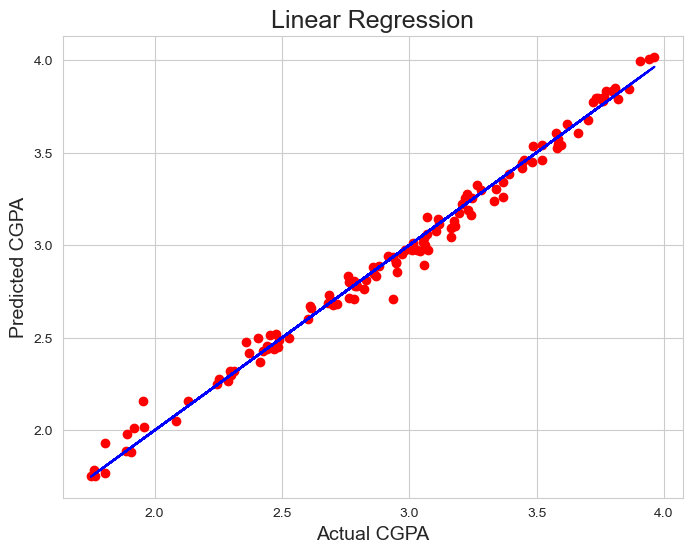

In [108]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_lrh,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual CGPA',fontsize=14)
plt.ylabel('Predicted CGPA',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lrh.png')
plt.show()

In [109]:
x.shape

(491, 41)

In [110]:
y.shape

(491,)

In [111]:
from sklearn.decomposition import PCA

In [112]:
mz=[10,20,30,35,33]
for i in mz:
    pca = PCA(i)
    x_pca = pca.fit_transform(x)
    x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.25, random_state=348)
    lr.fit(x_train_pca,y_train)
    pred_test_lrp=lr.predict(x_test_pca)
    print('n_components =',i)
    print("r2_score is = ",r2_score(y_test,pred_test_lrp)*100)
    print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_lrp))
    print('mean_squared_error = ',mean_squared_error(y_test,pred_test_lrp))
    print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_lrp)),'\n')

n_components = 10
r2_score is =  99.03978467945035
mean_absolute_error =  0.04268157242820561
mean_squared_error =  0.003096509579541121
root_mean_squared_error =  0.05564628989915789 

n_components = 20
r2_score is =  99.00832874930214
mean_absolute_error =  0.044014195460094864
mean_squared_error =  0.0031979488994027688
root_mean_squared_error =  0.056550410249641594 

n_components = 30
r2_score is =  99.065393953401
mean_absolute_error =  0.04341337512618821
mean_squared_error =  0.0030139246005096605
root_mean_squared_error =  0.054899222221354474 

n_components = 35
r2_score is =  99.0310819615734
mean_absolute_error =  0.042999378042065536
mean_squared_error =  0.003124574169531794
root_mean_squared_error =  0.05589789056424038 

n_components = 33
r2_score is =  99.04481041872376
mean_absolute_error =  0.04337648797178823
mean_squared_error =  0.0030803025377752397
root_mean_squared_error =  0.05550047331127222 



In [113]:
pca = PCA(n_components=30)
x_pca = pca.fit_transform(x)
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.25, random_state=348)

In [114]:
lrp=LinearRegression()
gbp=GradientBoostingRegressor()
adap=AdaBoostRegressor()
rfcp=RandomForestRegressor()
svcp=SVR()
dtcp=DecisionTreeRegressor()
knnp=KNeighborsRegressor()

In [115]:
lrp.fit(x_train_pca,y_train)
pred_test_lrp=lrp.predict(x_test_pca)
print("r2_score is = ",r2_score(y_test,pred_test_lrp)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_lrp))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_lrp))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_lrp)),'\n')

r2_score is =  99.065393953401
mean_absolute_error =  0.04341337512618821
mean_squared_error =  0.0030139246005096605
root_mean_squared_error =  0.054899222221354474 



In [116]:
pred_lrp_ac=r2_score(y_test,pred_test_lrp)
for i in range(2,15):
    lsscore=cross_val_score(lrp,x_pca,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_lrp_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 98.2567223551422
Accuracy score is = 99.065393953401


At cv = 3
Cross validation score is = 98.46744592340562
Accuracy score is = 99.065393953401


At cv = 4
Cross validation score is = 98.59249500433324
Accuracy score is = 99.065393953401


At cv = 5
Cross validation score is = 98.76200463392145
Accuracy score is = 99.065393953401


At cv = 6
Cross validation score is = 98.76424065011834
Accuracy score is = 99.065393953401


At cv = 7
Cross validation score is = 98.6692952324488
Accuracy score is = 99.065393953401


At cv = 8
Cross validation score is = 98.7950571280034
Accuracy score is = 99.065393953401


At cv = 9
Cross validation score is = 98.77859738284775
Accuracy score is = 99.065393953401


At cv = 10
Cross validation score is = 98.81773774331187
Accuracy score is = 99.065393953401


At cv = 11
Cross validation score is = 98.83682391791979
Accuracy score is = 99.065393953401


At cv = 12
Cross validation score is = 98.81688100653031
Accu

In [117]:
# GradientBoostingRegressor
gbp.fit(x_train_pca,y_train)
pred_test_gbp=gbp.predict(x_test_pca)
print("r2_score is = ",r2_score(y_test,pred_test_gbp)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_gbp))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_gbp))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_gbp)))

r2_score is =  98.77836365727724
mean_absolute_error =  0.04685961650469249
mean_squared_error =  0.003939542055828921
root_mean_squared_error =  0.06276577137125713


In [118]:
pred_gbp_ac=r2_score(y_test,pred_test_gbp)
for i in range(2,15):
    lsscore=cross_val_score(gbp,x_pca,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_gbp_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 98.41978100303433
Accuracy score is = 98.77836365727724


At cv = 3
Cross validation score is = 98.81919603919914
Accuracy score is = 98.77836365727724


At cv = 4
Cross validation score is = 98.83235553474061
Accuracy score is = 98.77836365727724


At cv = 5
Cross validation score is = 98.80060315135992
Accuracy score is = 98.77836365727724


At cv = 6
Cross validation score is = 98.90237451898382
Accuracy score is = 98.77836365727724


At cv = 7
Cross validation score is = 98.80454480670046
Accuracy score is = 98.77836365727724


At cv = 8
Cross validation score is = 98.89617345060708
Accuracy score is = 98.77836365727724


At cv = 9
Cross validation score is = 98.76229793801528
Accuracy score is = 98.77836365727724


At cv = 10
Cross validation score is = 98.81855021954244
Accuracy score is = 98.77836365727724


At cv = 11
Cross validation score is = 98.93202797089143
Accuracy score is = 98.77836365727724


At cv = 12
Cross validation score is =

In [ ]:
# AdaBoostRegressor
adap.fit(x_train_pca,y_train)
pred_test_adap=adap.predict(x_test_pca)
print("r2_score is = ",r2_score(y_test,pred_test_adap)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_adap))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_adap))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_adap)))

In [ ]:
# RandomForestRegressor
rfcp.fit(x_train_pca,y_train)
pred_test_rfcp=rfcp.predict(x_test_pca)
print("r2_score is = ",r2_score(y_test,pred_test_rfcp)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_rfcp))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_rfcp))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_rfcp)))

In [ ]:
pred_rfcp_ac=r2_score(y_test,pred_test_rfcp)
for i in range(2,15):
    lsscore=cross_val_score(rfcp,x_pca,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_rfcp_ac*100)
    print('\n')